## Project Description 
AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).
A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.
You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.
Objective
	1. To predict whether a liability customer will buy a personal loan or not.
	2. Which variables are most significant.
	3. Which segment of customers should be targeted more.
Data Dictionary
* ID: Customer ID
* Age: Customer’s age in completed years
* Experience: #years of professional experience
* Income: Annual income of the customer (in thousand dollars)
* ZIP Code: Home Address ZIP code.
* Family: the Family size of the customer
* CCAvg: Average spending on credit cards per month (in thousand dollars)
* Education: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* Mortgage: Value of house mortgage if any. (in thousand dollars)
* Personal_Loan: Did this customer accept the personal loan offered in the last campaign?
* Securities_Account: Does the customer have securities account with the bank?
* CD_Account: Does the customer have a certificate of deposit (CD) account with the bank?
* Online: Do customers use internet banking facilities?
* CreditCard: Does the customer use a credit card issued by any other Bank (excluding All life Bank)?

Best Practices for Notebook : 
	• The notebook should be well-documented, with inline comments explaining the functionality of code and markdown cells containing comments on the observations and insights.
	• The notebook should be run from start to finish in a sequential manner before submission.
	• It is preferable to remove all warnings and errors before submission.
	• The notebook should be submitted as an HTML file (.html) and as a notebook file (.ipynb)
Submission Guidelines :
	1. There are two parts to the submission: 
		1. A well commented Jupyter notebook [format - .ipynb]
		2. File converted to HTML format 
	2. Any assignment found copied/ plagiarized with other groups will not be graded and awarded zero marks
	3. Please ensure timely submission as any submission post-deadline will not be accepted for evaluation
	4. Submission will not be evaluated if,
		1. it is submitted post-deadline, or,
		2. more than 2 files are submitted


In [1]:
# this will help in making the Python code more structured automatically (good coding practice)
## %load_ext nb_black

# Library to suppress warnings or deprecation notes
import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To build model for prediction

from sklearn.linear_model import LogisticRegression


# To get diferent metric scores
from sklearn.metrics import (
  f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
)

In [2]:
##  Read the dataset
loans = pd.read_csv("Loan_Modelling.csv")
# copying data to another varaible to avoid any changes to original data
data = loans.copy()


In [3]:
data.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
data.shape

(5000, 14)

In [5]:
#Let's check the duplicate data. And if any, we should remove it
data[data.duplicated()].count()
# No duplicate value are found

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

In [6]:
## Check the data types of the columns for the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


### Insights:

- Most of the data-types are either **int64** or **float64**.

In [7]:
##  New variable "Buy_Personal_Loan" to predict wheteher the customer will buy a Personal loan or not 
data["BuyPersonal_Loan"]=((data["Personal_Loan"]>0) |(data["Securities_Account"]>0) |(data["CD_Account"]>0)|(data["CreditCard"]>0) )
data.tail()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,BuyPersonal_Loan
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0,False
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0,False
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0,False
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0,False
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1,True


In [8]:
data.BuyPersonal_Loan.value_counts()

False    2857
True     2143
Name: BuyPersonal_Loan, dtype: int64

In [9]:
##Checking  for missing values
data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
BuyPersonal_Loan      0
dtype: int64

In [10]:
data_1 = data.copy()
## data_1["Postal_Code"]=data_1["ZIPCode"]
##data_1.drop("ZIP_City", axis=1, inplace=True)


In [11]:
data.tail()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,BuyPersonal_Loan
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0,False
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0,False
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0,False
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0,False
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1,True


In [12]:
! pip install uszipcode
from uszipcode import SearchEngine, SimpleZipcode, Zipcode
search = SearchEngine(simple_zipcode=False)

In [13]:
## Function for returning CITY based on ZIP code lookup
def zco_city(x):
    res = search.by_zipcode(x)
    return res.major_city 

In [14]:
def zco_state(x):
    res = search.by_zipcode(x)
    return res.state 

In [15]:
## Creating a new column ZIP_City to have the CITY name of the 
data_1["ZIP_City"]=''
# data_1["ZIP_City"] = data_1["ZIPCode"].apply(zco)
data_1["ZIP_City"]= data_1["ZIPCode"].transform(zco_city)

In [16]:
## Creating a new column ZIP_State to have the CITY name of the Zip code as categorical variable 
data_1["ZIP_State"]=''
# data_1["ZIP_City"] = data_1["ZIPCode"].apply(zco)
data_1["ZIP_State"]= data_1["ZIPCode"].transform(zco_city)

In [17]:
## Drop ZIPCode column as it is numerical and needs to be categorical 
data_1.drop(["ZIPCode","ID"], axis=1, inplace=True)
data_1.tail()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,BuyPersonal_Loan,ZIP_City,ZIP_State
4995,29,3,40,1,1.9,3,0,0,0,0,1,0,False,Irvine,Irvine
4996,30,4,15,4,0.4,1,85,0,0,0,1,0,False,La Jolla,La Jolla
4997,63,39,24,2,0.3,3,0,0,0,0,0,0,False,Ojai,Ojai
4998,65,40,49,3,0.5,2,0,0,0,0,1,0,False,Los Angeles,Los Angeles
4999,28,4,83,3,0.8,1,0,0,0,0,1,1,True,Irvine,Irvine


In [18]:
 data_1.info()
 data_1.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   Family              5000 non-null   int64  
 4   CCAvg               5000 non-null   float64
 5   Education           5000 non-null   int64  
 6   Mortgage            5000 non-null   int64  
 7   Personal_Loan       5000 non-null   int64  
 8   Securities_Account  5000 non-null   int64  
 9   CD_Account          5000 non-null   int64  
 10  Online              5000 non-null   int64  
 11  CreditCard          5000 non-null   int64  
 12  BuyPersonal_Loan    5000 non-null   bool   
 13  ZIP_City            4966 non-null   object 
 14  ZIP_State           4966 non-null   object 
dtypes: bool(1), float64(1), int64(11), object(2)
memory usa

Age                    0
Experience             0
Income                 0
Family                 0
CCAvg                  0
Education              0
Mortgage               0
Personal_Loan          0
Securities_Account     0
CD_Account             0
Online                 0
CreditCard             0
BuyPersonal_Loan       0
ZIP_City              34
ZIP_State             34
dtype: int64

In [19]:
### Checking for NULLS in the ZIP_City                 
data_1[data_1.ZIP_City.isnull()]
data_1[data_1.ZIP_City.isnull()].count()

Age                   34
Experience            34
Income                34
Family                34
CCAvg                 34
Education             34
Mortgage              34
Personal_Loan         34
Securities_Account    34
CD_Account            34
Online                34
CreditCard            34
BuyPersonal_Loan      34
ZIP_City               0
ZIP_State              0
dtype: int64

##### We will drop the entries with no ZIP_City /ZIP_State as this is a difficult column to impute.

In [20]:
data_1.dropna(subset=["ZIP_City"], inplace=True)
# let us reset the dataframe index
data_1.reset_index(inplace=True, drop=True)

In [21]:
data=data_1.copy()
data.shape

(4966, 15)

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4966 entries, 0 to 4965
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 4966 non-null   int64  
 1   Experience          4966 non-null   int64  
 2   Income              4966 non-null   int64  
 3   Family              4966 non-null   int64  
 4   CCAvg               4966 non-null   float64
 5   Education           4966 non-null   int64  
 6   Mortgage            4966 non-null   int64  
 7   Personal_Loan       4966 non-null   int64  
 8   Securities_Account  4966 non-null   int64  
 9   CD_Account          4966 non-null   int64  
 10  Online              4966 non-null   int64  
 11  CreditCard          4966 non-null   int64  
 12  BuyPersonal_Loan    4966 non-null   bool   
 13  ZIP_City            4966 non-null   object 
 14  ZIP_State           4966 non-null   object 
dtypes: bool(1), float64(1), int64(11), object(2)
memory usa

In [23]:
## Since I amn not getting any city from ZIP code  we ill be dropping the 
# Summary statistics
data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,4966,NaN,NaN,NaN,45.3538,11.4628,23,35,45,55,67
Experience,4966,NaN,NaN,NaN,20.1198,11.4679,-3,10,20,30,43
Income,4966,NaN,NaN,NaN,73.8278,46.0423,8,39,64,98,224
Family,4966,NaN,NaN,NaN,2.3971,1.14761,1,1,2,3,4
CCAvg,4966,NaN,NaN,NaN,1.93702,1.74393,0,0.7,1.5,2.5,10
Education,4966,NaN,NaN,NaN,1.88039,0.840197,1,1,2,3,3
Mortgage,4966,NaN,NaN,NaN,56.6687,101.865,0,0,0,101,635
Personal_Loan,4966,NaN,NaN,NaN,0.0960532,0.294694,0,0,0,0,1
Securities_Account,4966,NaN,NaN,NaN,0.104108,0.305431,0,0,0,0,1
CD_Account,4966,NaN,NaN,NaN,0.0608135,0.239012,0,0,0,0,1


## Observations
- Age and Experience seems normally distributed.
- Income has awider range and is skewed to the right.
- Mortage data is skewed to the left.There are potential outliers

 ## Univariate analysis - Bivariate analysis

#### Key meaningful observations on the relationship between variables

In [24]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [25]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

#### Observations on Age 

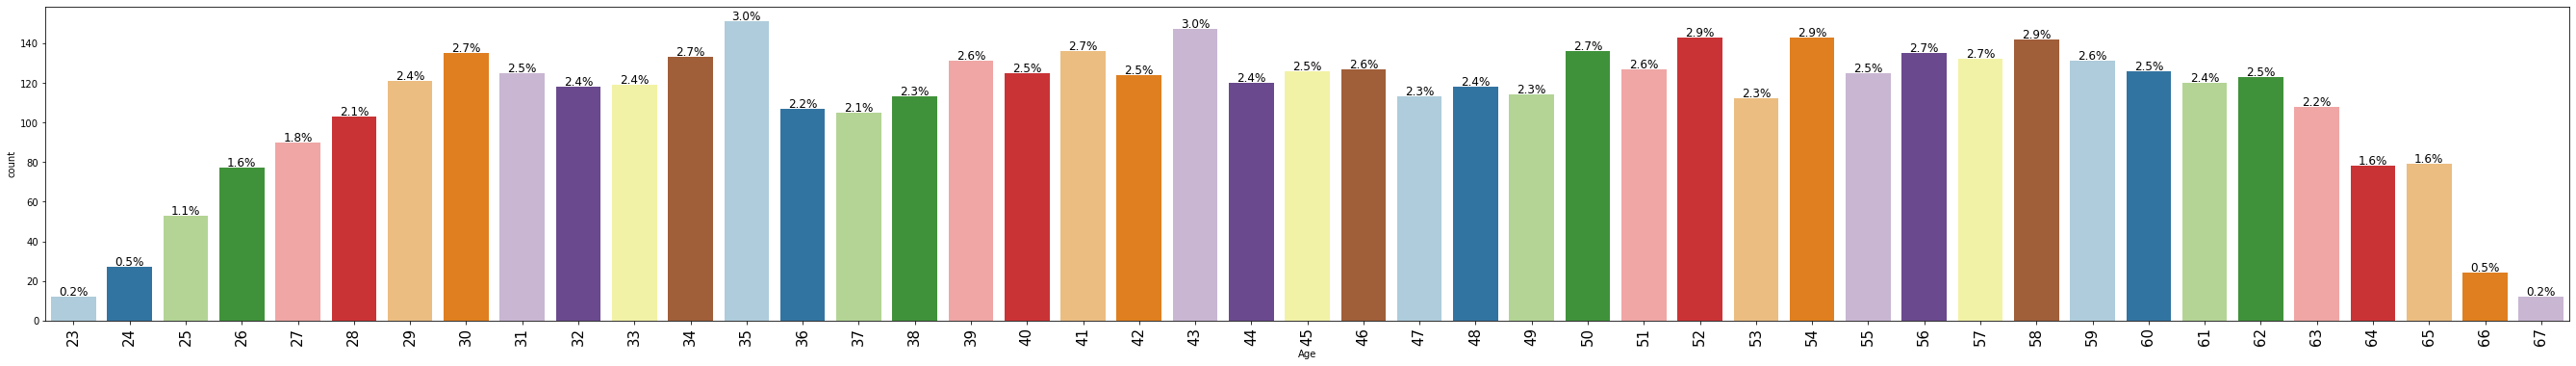

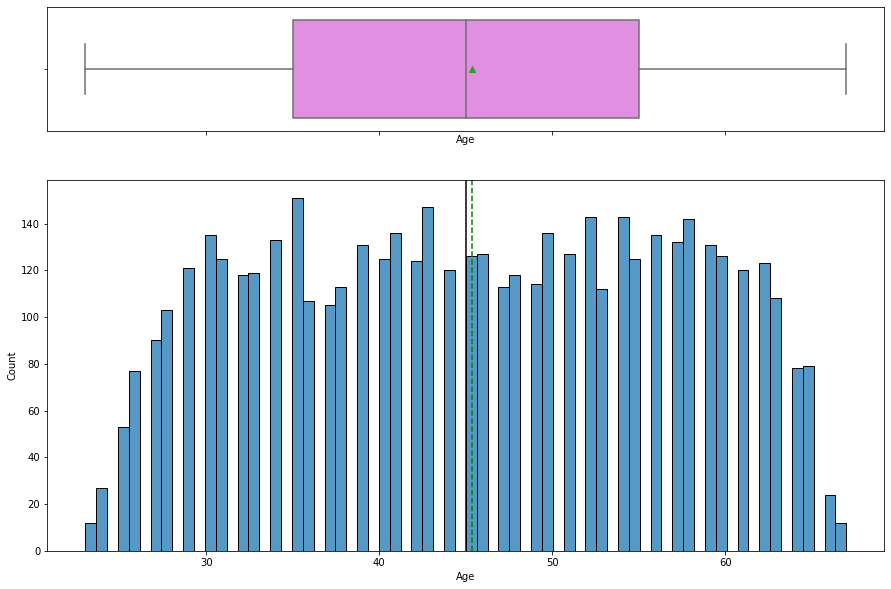

In [26]:
labeled_barplot(data, "Age", perc=True)
histogram_boxplot(data, "Age", bins=70)

 - Age dvzdcDistribution seems normal

In [27]:
#### Observations on Experience 

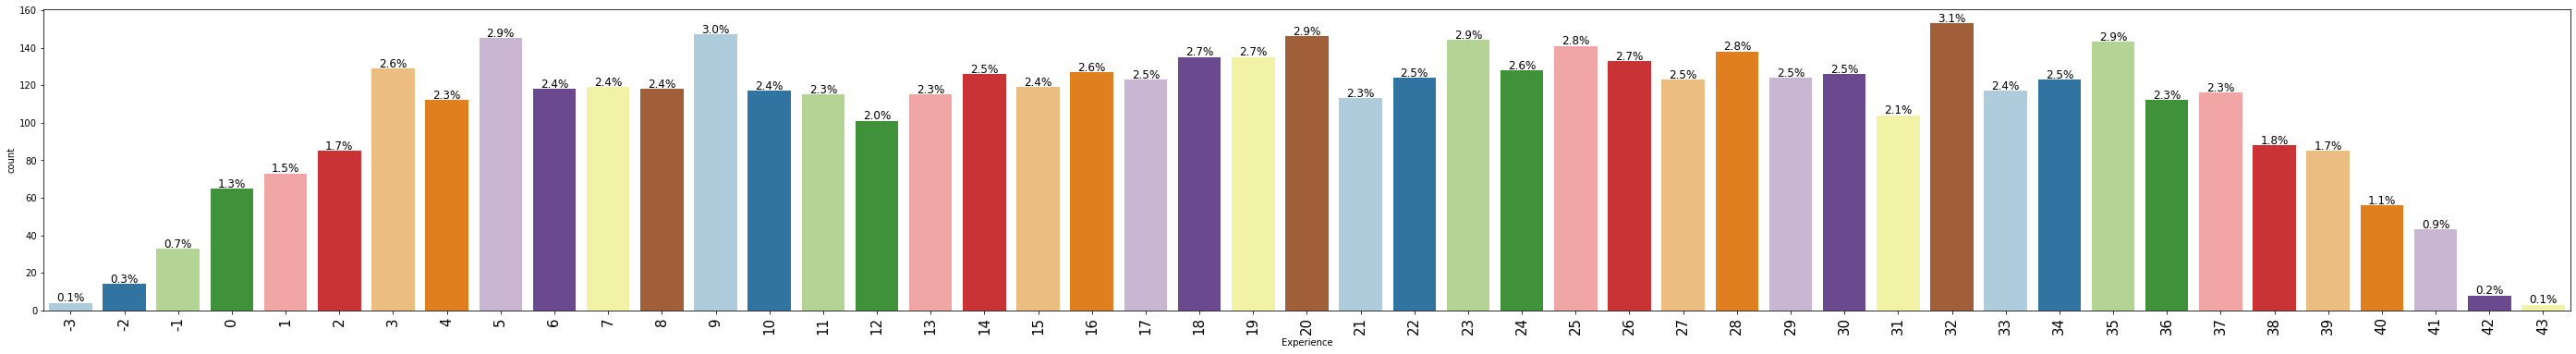

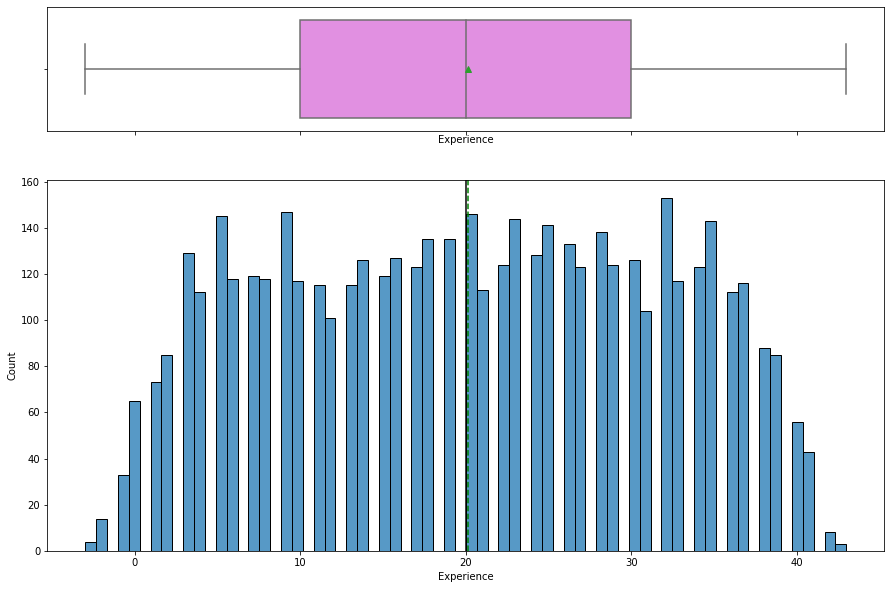

In [28]:
labeled_barplot(data, "Experience", perc=True)
histogram_boxplot(data, "Experience", bins=70)

 - Distribution seems normal

#### Observation on Income 

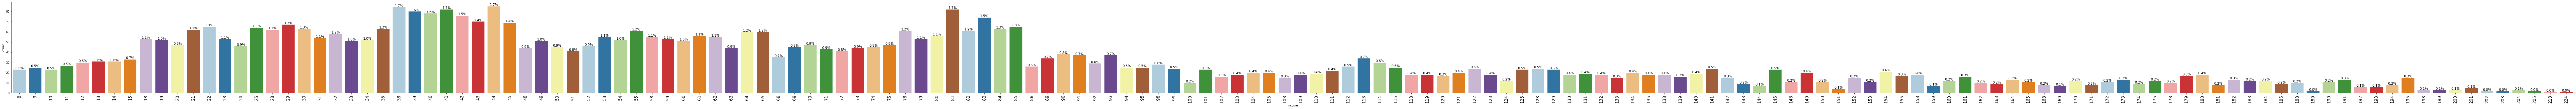

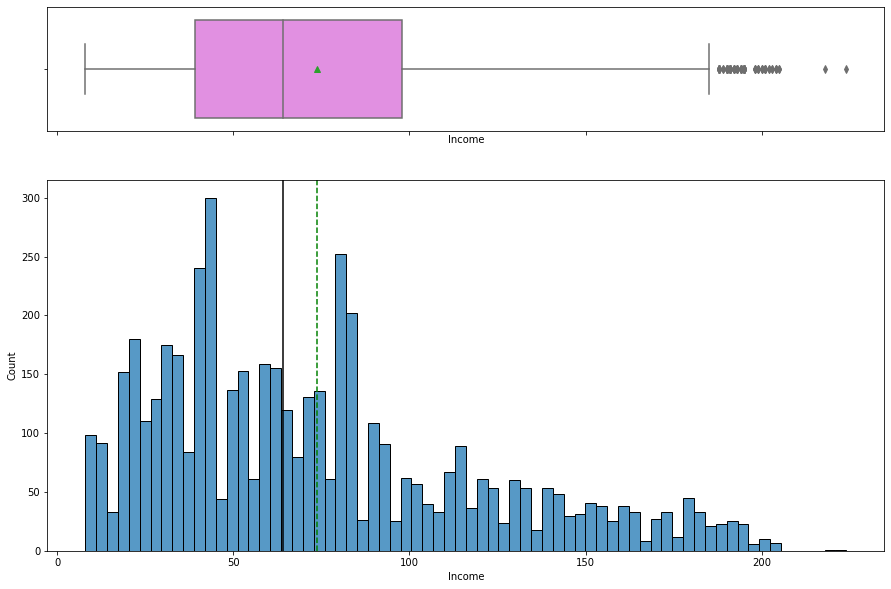

In [29]:
labeled_barplot(data, "Income", perc=True)
histogram_boxplot(data, "Income", bins=70)

- Distribution is skewed to the right 

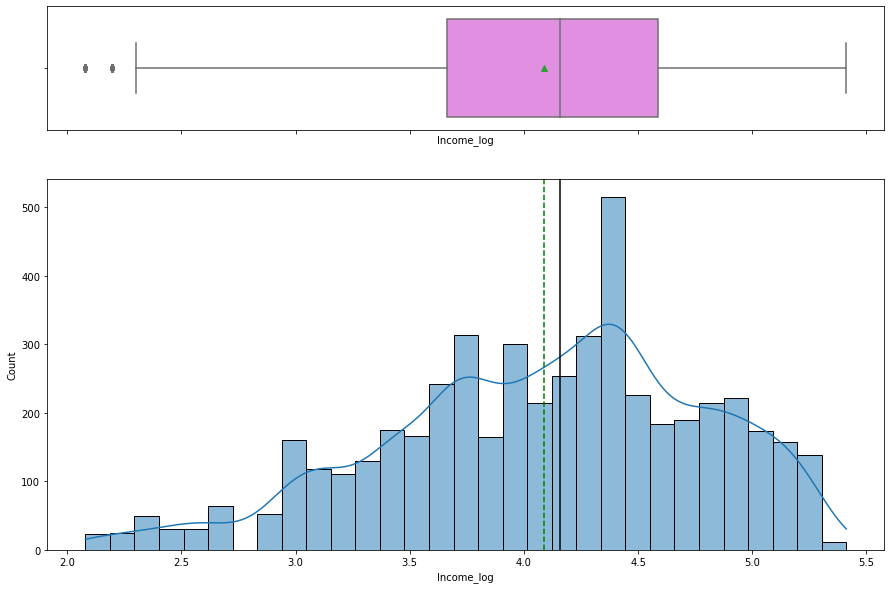

In [30]:
# Creating a new column with the transformed variable
data["Income_log"] = np.log(data["Income"])
histogram_boxplot(data, "Income_log", kde=True)

- Using the log transformation has definitely helped in reducing the skew.

#### Observation on Education 

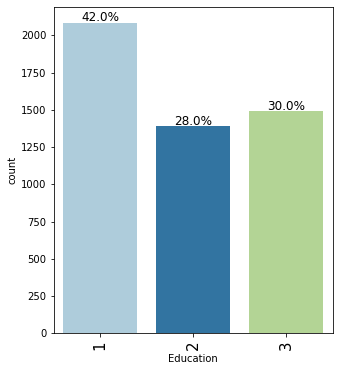

In [31]:
labeled_barplot(data, "Education", perc=True)

- 42% of the customers are under graduates,followed by 30%  Advanced Professional  

#### Observation on Mortgage 

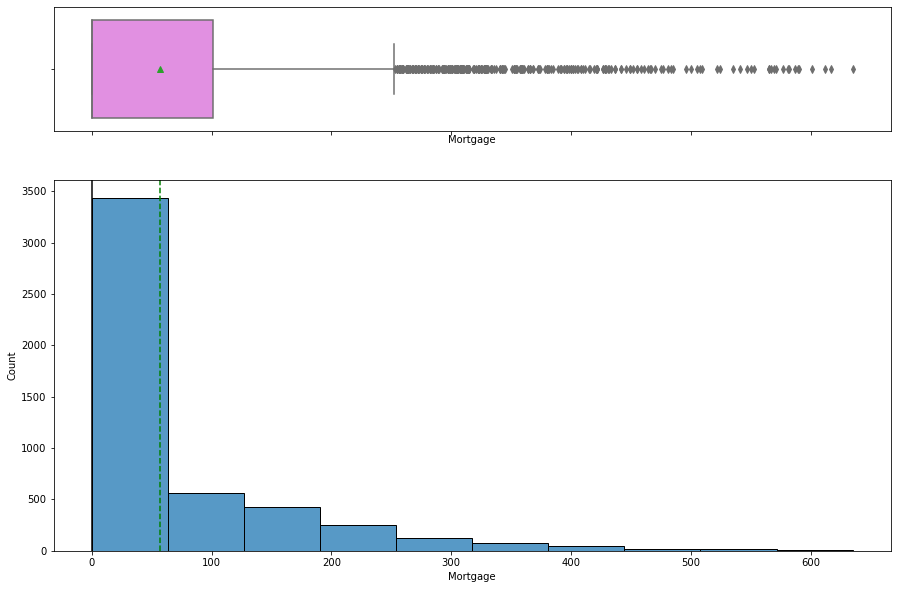

In [32]:
histogram_boxplot(data, "Mortgage", bins=10)

- Mortgage seems to be right skewed 

#### Observation on Personal_Loan  

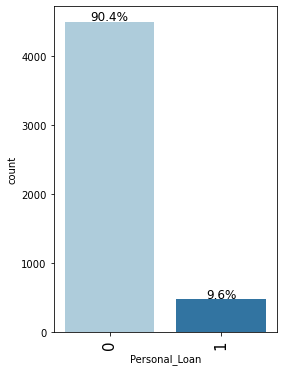

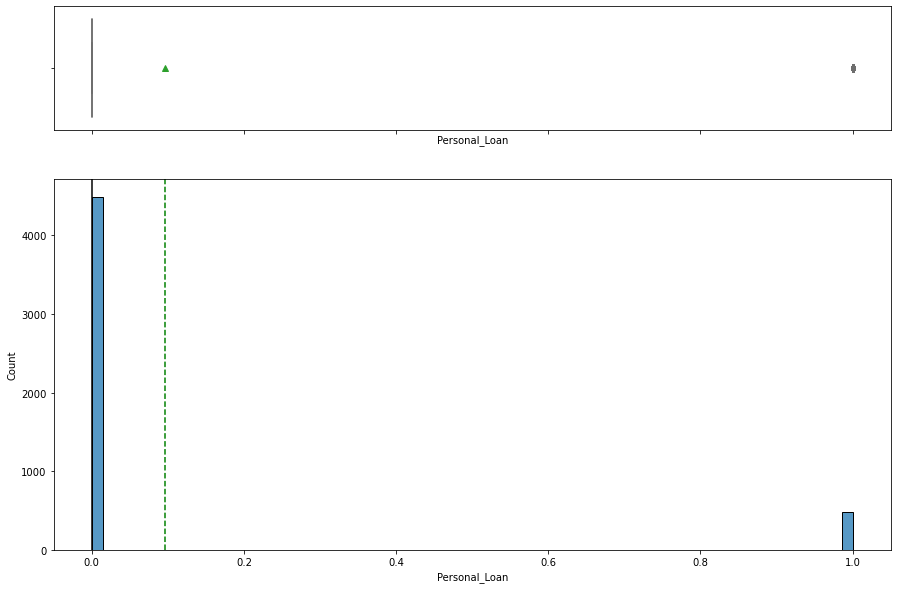

In [33]:
labeled_barplot(data, "Personal_Loan", perc=True)
histogram_boxplot(data, "Personal_Loan", bins=70)

-90% + Most of the customers did not accept personal loans

#### Observation on Securities_Account  

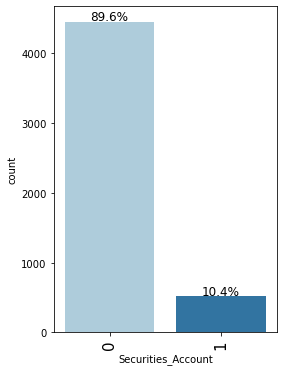

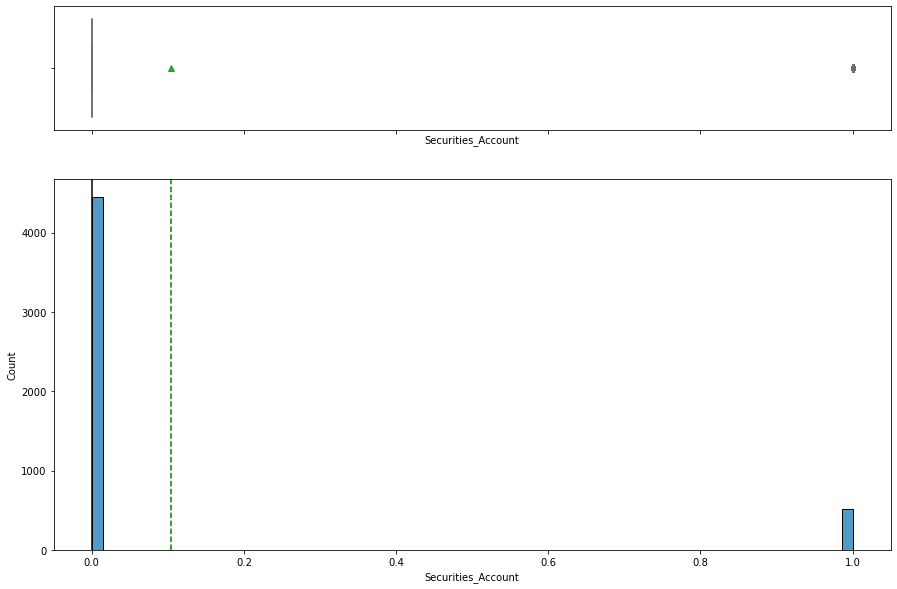

In [34]:
labeled_barplot(data, "Securities_Account", perc=True)
histogram_boxplot(data, "Securities_Account", bins=70)

-89%+ Most of the customers did not accept Securities_Account loans

#### Observation on  CD_Account 

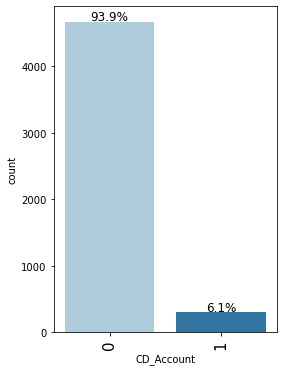

In [35]:
labeled_barplot(data, "CD_Account", perc=True)

-93 %+  of the customers did not accept Securities_Account loans

#### Observation on  Online 

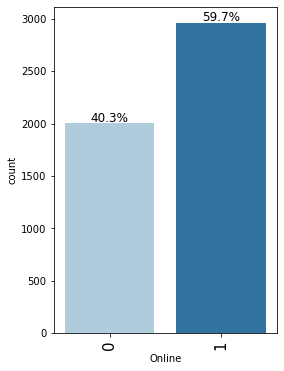

In [36]:
labeled_barplot(data, "Online", perc=True)

In [37]:
data[data.Income_log.isnull()].count()
## data.Mortgage_log.fillna(0,inplace=True)
data.Income_log.value_counts()

3.784190    85
3.637586    84
4.394449    82
3.713572    82
3.663562    80
3.688879    78
3.737670    76
4.418841    74
3.761200    70
3.806662    69
3.367296    67
4.442651    65
3.091042    65
3.218876    64
3.555348    63
4.430817    63
3.401197    63
3.332205    62
3.044522    62
4.356709    61
4.007333    61
4.406719    61
4.158883    60
4.174387    60
3.465736    58
4.382027    56
4.110874    56
4.060443    55
4.127134    55
3.970292    55
3.433987    54
4.369448    53
2.890372    53
3.135494    53
4.077537    53
2.944439    52
3.526361    52
3.988984    52
3.496508    51
3.891820    51
4.094345    51
4.317488    47
2.995732    47
4.248495    47
3.178054    46
3.951244    46
4.234107    45
4.304065    45
3.912023    45
4.290459    44
4.143135    44
3.871201    44
4.262680    43
3.931826    41
4.276666    41
4.499810    38
4.532599    37
4.510860    37
4.219508    35
4.727388    34
4.488636    34
2.708050    33
2.639057    31
2.564949    31
4.736198    30
2.484907    30
4.521789  

- Income log transformation variable distribution has no missing values.

In [38]:
## data.Mortgage_log.fillna(0,inplace=True)
##data.Mortgage_log.value_counts()

- Looks like the log transformation is not helping the skewness /outlier correction.
- We will drop the Mortgage_log column

In [39]:
## Drop ZIPCode column as it is numerical and needs to be categorical 
##data.drop(["Mortgage_log"], axis=1, inplace=True)

In [40]:
data.tail()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,BuyPersonal_Loan,ZIP_City,ZIP_State,Income_log
4961,29,3,40,1,1.9,3,0,0,0,0,1,0,False,Irvine,Irvine,3.688879
4962,30,4,15,4,0.4,1,85,0,0,0,1,0,False,La Jolla,La Jolla,2.708050
4963,63,39,24,2,0.3,3,0,0,0,0,0,0,False,Ojai,Ojai,3.178054
4964,65,40,49,3,0.5,2,0,0,0,0,1,0,False,Los Angeles,Los Angeles,3.891820
4965,28,4,83,3,0.8,1,0,0,0,0,1,1,True,Irvine,Irvine,4.418841


## Bi Variate Analysis 

In [41]:
# function to plot stacked bar chart
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

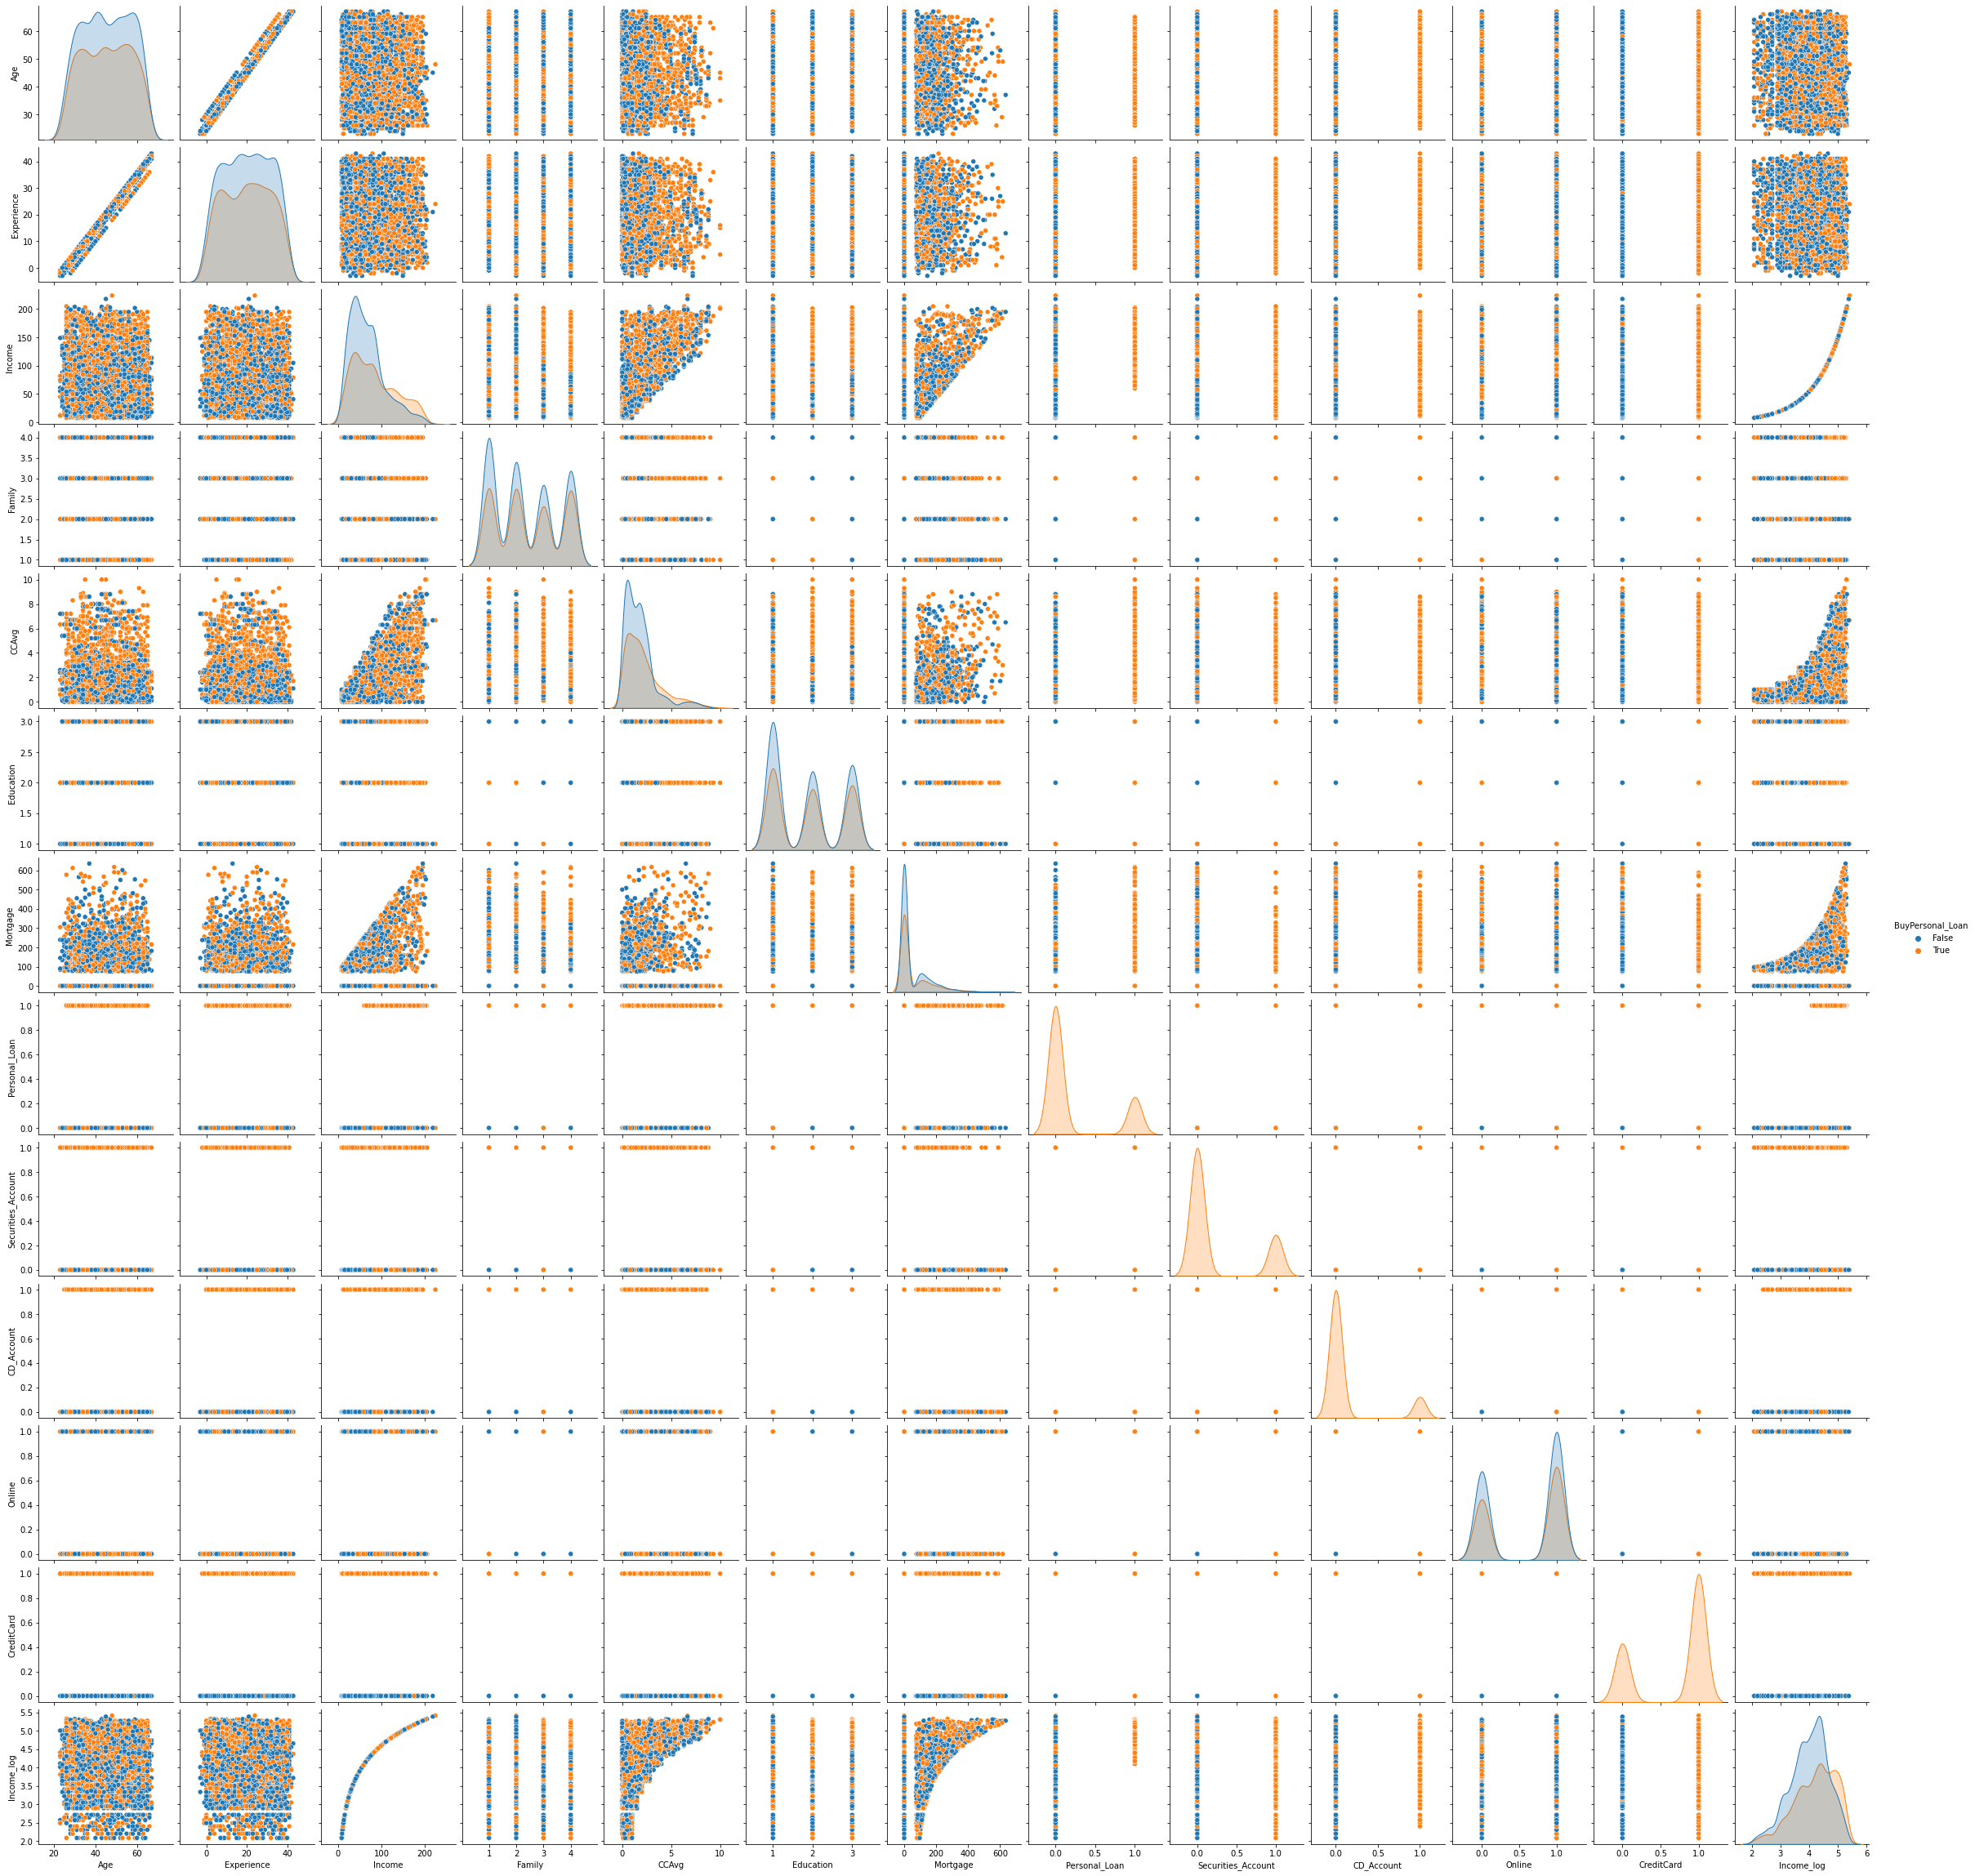

In [42]:
sns.pairplot(data=data, hue="BuyPersonal_Loan")
plt.show()

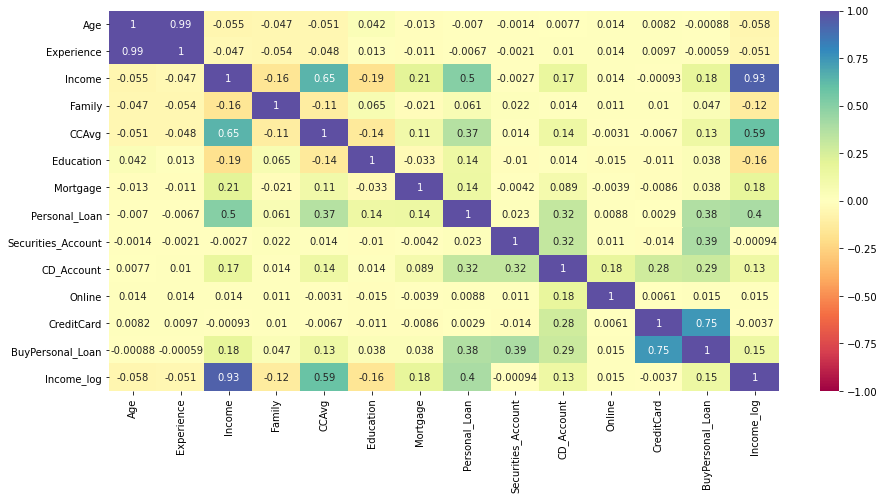

In [43]:
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, cmap="Spectral")
plt.show()

- BuyPersonal_loan is having strong correlation with CreditCard
- Income/Income_log and CCAVG are strongly corelated 
- Age and Experience are strongly correlated.Hence we can drop either one of features.

 ###### Observation on  Family  versus Personal_Loan 

Personal_Loan     0    1   All
Family                        
All            4489  477  4966
4              1082  133  1215
3               870  132  1002
1              1354  106  1460
2              1183  106  1289
------------------------------------------------------------------------------------------------------------------------


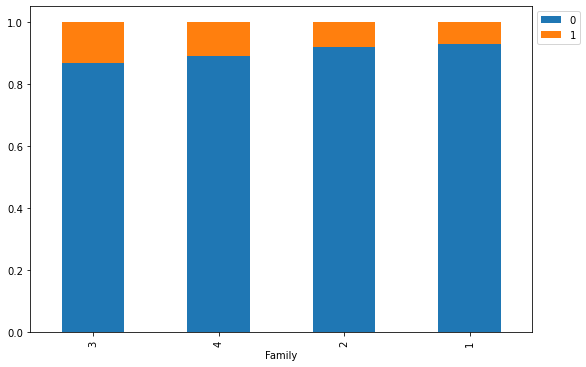

In [44]:
stacked_barplot(data, "Family","Personal_Loan")

- Family Size of 4 took the most number of Personal Loans offered.

In [45]:
data.ZIP_City.value_counts()

Los Angeles      375
San Diego        269
San Francisco    257
Berkeley         241
Sacramento       148
                ... 
Tahoe City         1
Sierra Madre       1
Ladera Ranch       1
Sausalito          1
Stinson Beach      1
Name: ZIP_City, Length: 244, dtype: int64

In [46]:
df_CITY = data[["ZIP_City","Personal_Loan","CD_Account","CreditCard","Education","Mortgage"]]
df_CITY.sort_values('Mortgage',inplace=True, ascending=False)
## df_CITY.groupby("ZIP_City")["Mortgage"].head(10)
##df_CITY.groupby("ZIP_City")["Mortgage"].mean()
## df_CITY.groupby("ZIP_City")["Mortgage"].mean().nlargest()
df_CITY
## df_CITYL



,ZIP_City,Personal_Loan,CD_Account,CreditCard,Education,Mortgage
2908,Montclair,0,0,0,1,635
300,West Sacramento,1,0,0,1,617
4778,San Diego,1,0,0,3,612
1764,Berkeley,0,0,0,1,601
4808,Hopland,1,0,0,2,590
...,...,...,...,...,...,...
1956,Davis,0,0,0,1,0
1957,Palo Alto,0,0,1,3,0
1958,Oakland,0,0,0,3,0
1959,Northridge,0,0,0,1,0


 ###### Observation on  Largest Mean ZIP_City versus Mortgage 

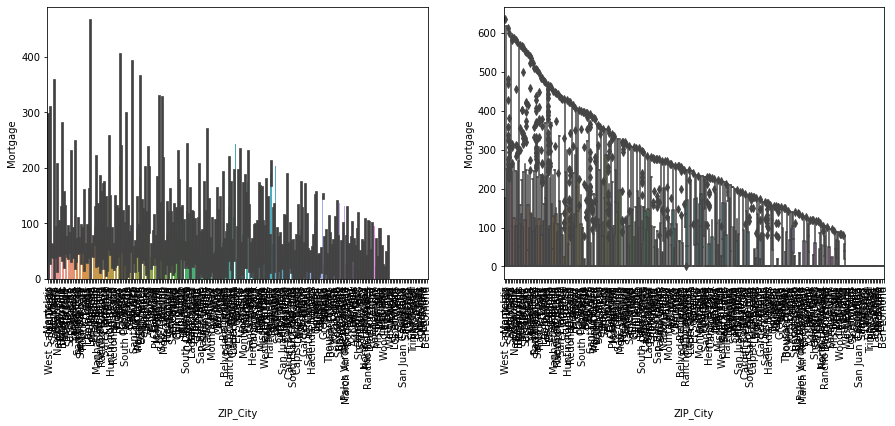

In [47]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.barplot(data=df_CITY, y="Mortgage", x="ZIP_City")
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
sns.boxplot(data=df_CITY, y="Mortgage", x="ZIP_City")
plt.xticks(rotation=90)

plt.show()
## stacked_barplot(df_CITY, "Mortgage", "ZIP_City")

 ###### Observation on  BuyPersonal_Loan  versus Income/Income_log

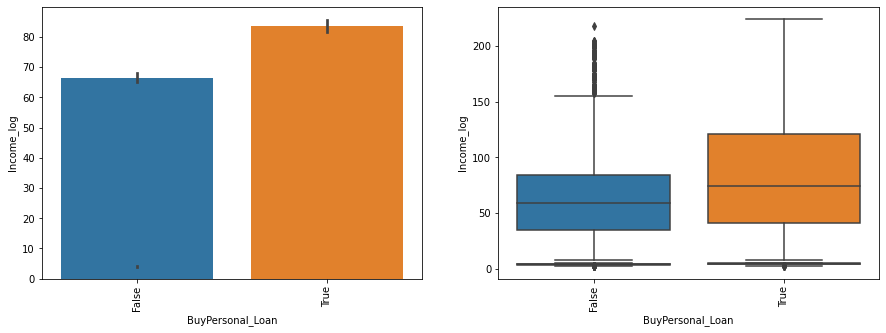

In [48]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.barplot(data=data, y="Income", x="BuyPersonal_Loan")
sns.barplot(data=data, y="Income_log", x="BuyPersonal_Loan")
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
sns.boxplot(data=data, y="Income", x="BuyPersonal_Loan")
sns.boxplot(data=data, y="Income_log", x="BuyPersonal_Loan")
plt.xticks(rotation=90)

plt.show()

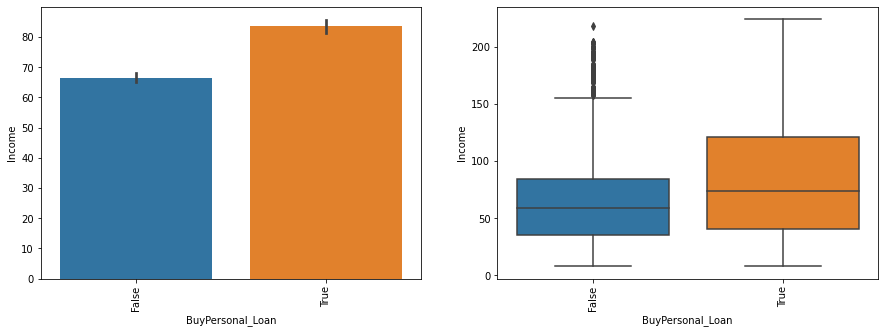

In [49]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.barplot(data=data, y="Income", x="BuyPersonal_Loan")
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
sns.boxplot(data=data, y="Income", x="BuyPersonal_Loan")
plt.xticks(rotation=90)

plt.show()

- Both the plots shows customers with higher income has more probabaility of buying Personal loans

In [50]:
###### Observation on  BuyPersonal_Loan  versus Age 

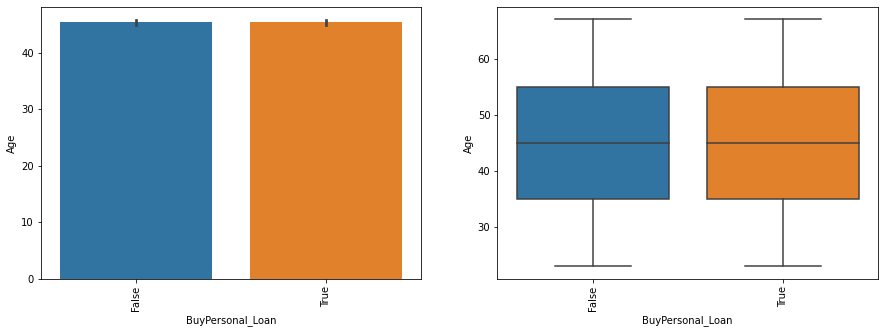

In [51]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.barplot(data=data, y="Age", x="BuyPersonal_Loan")
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
sns.boxplot(data=data, y="Age", x="BuyPersonal_Loan")
plt.xticks(rotation=90)

plt.show()

- Most of the expected Personal Loan buyer custopmers are between 35 to 55 years old

In [52]:
 ###### Observation on  BuyPersonal_Loan  versus Income/Income_log

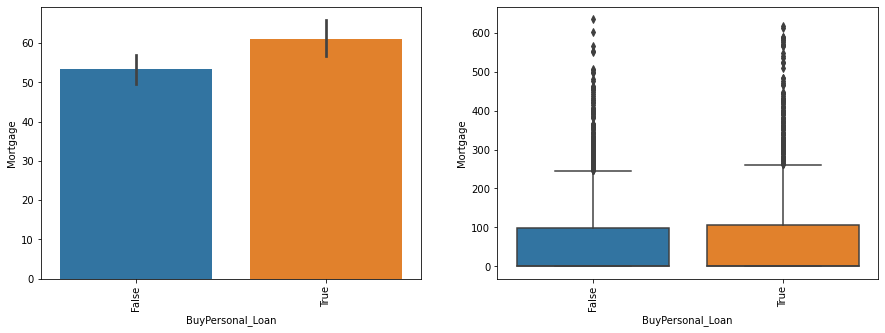

In [53]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.barplot(data=data, y="Mortgage", x="BuyPersonal_Loan")
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
sns.boxplot(data=data, y="Mortgage", x="BuyPersonal_Loan")
plt.xticks(rotation=90)

plt.show()

- Both the plots shows customers with higher Mortgage has more probabaility of buying Personal loans.

## Data Preparation

## Data Preprocessing 
Prepare the data for analysis - Missing value Treatment, Outlier Detection(treat, if needed), Feature Engineering, Prepare data for modelling and check the split

In [54]:
data["ZIP_State"].value_counts()

Los Angeles      375
San Diego        269
San Francisco    257
Berkeley         241
Sacramento       148
                ... 
Tahoe City         1
Sierra Madre       1
Ladera Ranch       1
Sausalito          1
Stinson Beach      1
Name: ZIP_State, Length: 244, dtype: int64

In [55]:
# dropping ZIP_State as the data pertains to CA only 
data = data.drop(["ZIP_State"], axis=1)
data.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,BuyPersonal_Loan,ZIP_City,Income_log
0,25,1,49,4,1.6,1,0,0,1,0,0,0,True,Pasadena,3.891820
1,45,19,34,3,1.5,1,0,0,1,0,0,0,True,Los Angeles,3.526361
2,39,15,11,1,1.0,1,0,0,0,0,0,0,False,Berkeley,2.397895
3,35,9,100,1,2.7,2,0,0,0,0,0,0,False,San Francisco,4.605170
4,35,8,45,4,1.0,2,0,0,0,0,0,1,True,Northridge,3.806662


In [56]:
## SKIPPING  Converting a the predicted variable to a 0 or 1 value
## data["BuyPersonal_Loan"] = data["BuyPersonal_Loan"].apply(lambda x: 1 if x == True  else 0)

In [57]:
data.BuyPersonal_Loan.value_counts()

False    2841
True     2125
Name: BuyPersonal_Loan, dtype: int64

In [58]:
# creating dummy varibles and updating data frame 
dummy_data = pd.get_dummies(
    data,
    columns=["ZIP_City",
    ],
    drop_first=True,   ## Drop_first reduces multicolinearity
)
dummy_data.head()
data=dummy_data.copy()

In [59]:
data.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,BuyPersonal_Loan,Income_log,ZIP_City_Alameda,ZIP_City_Alamo,ZIP_City_Albany,ZIP_City_Alhambra,ZIP_City_Anaheim,ZIP_City_Antioch,ZIP_City_Aptos,ZIP_City_Arcadia,ZIP_City_Arcata,ZIP_City_Bakersfield,ZIP_City_Baldwin Park,ZIP_City_Banning,ZIP_City_Bella Vista,ZIP_City_Belmont,ZIP_City_Belvedere Tiburon,ZIP_City_Ben Lomond,ZIP_City_Berkeley,ZIP_City_Beverly Hills,ZIP_City_Bodega Bay,ZIP_City_Bonita,ZIP_City_Boulder Creek,ZIP_City_Brea,ZIP_City_Brisbane,ZIP_City_Burlingame,ZIP_City_Calabasas,ZIP_City_Camarillo,ZIP_City_Campbell,ZIP_City_Canoga Park,ZIP_City_Capistrano Beach,ZIP_City_Capitola,ZIP_City_Cardiff By The Sea,ZIP_City_Carlsbad,ZIP_City_Carpinteria,ZIP_City_Carson,ZIP_City_Castro Valley,ZIP_City_Ceres,ZIP_City_Chatsworth,ZIP_City_Chico,ZIP_City_Chino,ZIP_City_Chino Hills,ZIP_City_Chula Vista,ZIP_City_Citrus Heights,ZIP_City_Claremont,ZIP_City_Clearlake,ZIP_City_Clovis,ZIP_City_Concord,ZIP_City_Costa Mesa,ZIP_City_Crestline,ZIP_City_Culver City,ZIP_City_Cupertino,ZIP_City_Cypress,ZIP_City_Daly City,ZIP_City_Danville,ZIP_City_Davis,ZIP_City_Diamond Bar,ZIP_City_Edwards,ZIP_City_El Dorado Hills,ZIP_City_El Segundo,ZIP_City_El Sobrante,ZIP_City_Elk Grove,ZIP_City_Emeryville,ZIP_City_Encinitas,ZIP_City_Escondido,ZIP_City_Eureka,ZIP_City_Fairfield,ZIP_City_Fallbrook,ZIP_City_Fawnskin,ZIP_City_Folsom,ZIP_City_Fremont,ZIP_City_Fresno,ZIP_City_Fullerton,ZIP_City_Garden Grove,ZIP_City_Gilroy,ZIP_City_Glendale,ZIP_City_Glendora,ZIP_City_Goleta,ZIP_City_Greenbrae,ZIP_City_Hacienda Heights,ZIP_City_Half Moon Bay,ZIP_City_Hawthorne,ZIP_City_Hayward,ZIP_City_Hermosa Beach,ZIP_City_Highland,ZIP_City_Hollister,ZIP_City_Hopland,ZIP_City_Huntington Beach,ZIP_City_Imperial,ZIP_City_Inglewood,ZIP_City_Irvine,ZIP_City_La Jolla,ZIP_City_La Mesa,ZIP_City_La Mirada,ZIP_City_La Palma,ZIP_City_Ladera Ranch,ZIP_City_Laguna Hills,ZIP_City_Laguna Niguel,ZIP_City_Lake Forest,ZIP_City_Larkspur,ZIP_City_Livermore,ZIP_City_Loma Linda,ZIP_City_Lomita,ZIP_City_Lompoc,ZIP_City_Long Beach,ZIP_City_Los Alamitos,ZIP_City_Los Altos,ZIP_City_Los Angeles,ZIP_City_Los Gatos,ZIP_City_Manhattan Beach,ZIP_City_March Air Reserve Base,ZIP_City_Marina,ZIP_City_Martinez,ZIP_City_Menlo Park,ZIP_City_Merced,ZIP_City_Milpitas,ZIP_City_Mission Hills,ZIP_City_Mission Viejo,ZIP_City_Modesto,ZIP_City_Monrovia,ZIP_City_Montague,ZIP_City_Montclair,ZIP_City_Montebello,ZIP_City_Monterey,ZIP_City_Monterey Park,ZIP_City_Moraga,ZIP_City_Morgan Hill,ZIP_City_Moss Landing,ZIP_City_Mountain View,ZIP_City_Napa,ZIP_City_National City,ZIP_City_Newbury Park,ZIP_City_Newport Beach,ZIP_City_North Hills,ZIP_City_North Hollywood,ZIP_City_Northridge,ZIP_City_Norwalk,ZIP_City_Novato,ZIP_City_Oak View,ZIP_City_Oakland,ZIP_City_Oceanside,ZIP_City_Ojai,ZIP_City_Orange,ZIP_City_Oxnard,ZIP_City_Pacific Grove,ZIP_City_Pacific Palisades,ZIP_City_Palo Alto,ZIP_City_Palos Verdes Peninsula,ZIP_City_Pasadena,ZIP_City_Placentia,ZIP_City_Pleasant Hill,ZIP_City_Pleasanton,ZIP_City_Pomona,ZIP_City_Porter Ranch,ZIP_City_Portola Valley,ZIP_City_Poway,ZIP_City_Rancho Cordova,ZIP_City_Rancho Cucamonga,ZIP_City_Rancho Palos Verdes,ZIP_City_Redding,ZIP_City_Redlands,ZIP_City_Redondo Beach,ZIP_City_Redwood City,ZIP_City_Reseda,ZIP_City_Richmond,ZIP_City_Ridgecrest,ZIP_City_Rio Vista,ZIP_City_Riverside,ZIP_City_Rohnert Park,ZIP_City_Rosemead,ZIP_City_Roseville,ZIP_City_Sacramento,ZIP_City_Salinas,ZIP_City_San Anselmo,ZIP_City_San Bernardino,ZIP_City_San Bruno,ZIP_City_San Clemente,ZIP_City_San Diego,ZIP_City_San Dimas,ZIP_City_San Francisco,ZIP_City_San Gabriel,ZIP_City_San Jose,ZIP_City_San Juan Bautista,ZIP_City_San Juan Capistrano,ZIP_City_San Leandro,ZIP_City_San Luis Obispo,ZIP_City_San Luis Rey,ZIP_City_San Marcos,ZIP_City_San Mateo,ZIP_City_San Pablo,ZIP_City_San Rafael,ZIP_City_San Ramon,ZIP_City_San Ysidro,ZIP_City_Sanger,ZIP_City_Santa Ana,ZIP_City_Santa Barbara,ZIP_City_Santa Clara,ZIP_City_Santa

## Model Building - Logistic Regression


#### Logistic Regression Model performance evaluation and improvement
 Comment on which metric is right for model performance evaluation and why? - Can model performance be improved? If yes, then do it using appropriate techniques for logistic regression and comment on model performance after improvement.

In [60]:
X = data.drop(["BuyPersonal_Loan"], axis=1)
Y = data["BuyPersonal_Loan"]
## get does create dummies (one hot encoding for all the columns )
## X = pd.get_dummies(X, drop_first=True)  ## Drop_first reduces multicolinearity

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)
X_train.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,Income_log,ZIP_City_Alameda,ZIP_City_Alamo,ZIP_City_Albany,ZIP_City_Alhambra,ZIP_City_Anaheim,ZIP_City_Antioch,ZIP_City_Aptos,ZIP_City_Arcadia,ZIP_City_Arcata,ZIP_City_Bakersfield,ZIP_City_Baldwin Park,ZIP_City_Banning,ZIP_City_Bella Vista,ZIP_City_Belmont,ZIP_City_Belvedere Tiburon,ZIP_City_Ben Lomond,ZIP_City_Berkeley,ZIP_City_Beverly Hills,ZIP_City_Bodega Bay,ZIP_City_Bonita,ZIP_City_Boulder Creek,ZIP_City_Brea,ZIP_City_Brisbane,ZIP_City_Burlingame,ZIP_City_Calabasas,ZIP_City_Camarillo,ZIP_City_Campbell,ZIP_City_Canoga Park,ZIP_City_Capistrano Beach,ZIP_City_Capitola,ZIP_City_Cardiff By The Sea,ZIP_City_Carlsbad,ZIP_City_Carpinteria,ZIP_City_Carson,ZIP_City_Castro Valley,ZIP_City_Ceres,ZIP_City_Chatsworth,ZIP_City_Chico,ZIP_City_Chino,ZIP_City_Chino Hills,ZIP_City_Chula Vista,ZIP_City_Citrus Heights,ZIP_City_Claremont,ZIP_City_Clearlake,ZIP_City_Clovis,ZIP_City_Concord,ZIP_City_Costa Mesa,ZIP_City_Crestline,ZIP_City_Culver City,ZIP_City_Cupertino,ZIP_City_Cypress,ZIP_City_Daly City,ZIP_City_Danville,ZIP_City_Davis,ZIP_City_Diamond Bar,ZIP_City_Edwards,ZIP_City_El Dorado Hills,ZIP_City_El Segundo,ZIP_City_El Sobrante,ZIP_City_Elk Grove,ZIP_City_Emeryville,ZIP_City_Encinitas,ZIP_City_Escondido,ZIP_City_Eureka,ZIP_City_Fairfield,ZIP_City_Fallbrook,ZIP_City_Fawnskin,ZIP_City_Folsom,ZIP_City_Fremont,ZIP_City_Fresno,ZIP_City_Fullerton,ZIP_City_Garden Grove,ZIP_City_Gilroy,ZIP_City_Glendale,ZIP_City_Glendora,ZIP_City_Goleta,ZIP_City_Greenbrae,ZIP_City_Hacienda Heights,ZIP_City_Half Moon Bay,ZIP_City_Hawthorne,ZIP_City_Hayward,ZIP_City_Hermosa Beach,ZIP_City_Highland,ZIP_City_Hollister,ZIP_City_Hopland,ZIP_City_Huntington Beach,ZIP_City_Imperial,ZIP_City_Inglewood,ZIP_City_Irvine,ZIP_City_La Jolla,ZIP_City_La Mesa,ZIP_City_La Mirada,ZIP_City_La Palma,ZIP_City_Ladera Ranch,ZIP_City_Laguna Hills,ZIP_City_Laguna Niguel,ZIP_City_Lake Forest,ZIP_City_Larkspur,ZIP_City_Livermore,ZIP_City_Loma Linda,ZIP_City_Lomita,ZIP_City_Lompoc,ZIP_City_Long Beach,ZIP_City_Los Alamitos,ZIP_City_Los Altos,ZIP_City_Los Angeles,ZIP_City_Los Gatos,ZIP_City_Manhattan Beach,ZIP_City_March Air Reserve Base,ZIP_City_Marina,ZIP_City_Martinez,ZIP_City_Menlo Park,ZIP_City_Merced,ZIP_City_Milpitas,ZIP_City_Mission Hills,ZIP_City_Mission Viejo,ZIP_City_Modesto,ZIP_City_Monrovia,ZIP_City_Montague,ZIP_City_Montclair,ZIP_City_Montebello,ZIP_City_Monterey,ZIP_City_Monterey Park,ZIP_City_Moraga,ZIP_City_Morgan Hill,ZIP_City_Moss Landing,ZIP_City_Mountain View,ZIP_City_Napa,ZIP_City_National City,ZIP_City_Newbury Park,ZIP_City_Newport Beach,ZIP_City_North Hills,ZIP_City_North Hollywood,ZIP_City_Northridge,ZIP_City_Norwalk,ZIP_City_Novato,ZIP_City_Oak View,ZIP_City_Oakland,ZIP_City_Oceanside,ZIP_City_Ojai,ZIP_City_Orange,ZIP_City_Oxnard,ZIP_City_Pacific Grove,ZIP_City_Pacific Palisades,ZIP_City_Palo Alto,ZIP_City_Palos Verdes Peninsula,ZIP_City_Pasadena,ZIP_City_Placentia,ZIP_City_Pleasant Hill,ZIP_City_Pleasanton,ZIP_City_Pomona,ZIP_City_Porter Ranch,ZIP_City_Portola Valley,ZIP_City_Poway,ZIP_City_Rancho Cordova,ZIP_City_Rancho Cucamonga,ZIP_City_Rancho Palos Verdes,ZIP_City_Redding,ZIP_City_Redlands,ZIP_City_Redondo Beach,ZIP_City_Redwood City,ZIP_City_Reseda,ZIP_City_Richmond,ZIP_City_Ridgecrest,ZIP_City_Rio Vista,ZIP_City_Riverside,ZIP_City_Rohnert Park,ZIP_City_Rosemead,ZIP_City_Roseville,ZIP_City_Sacramento,ZIP_City_Salinas,ZIP_City_San Anselmo,ZIP_City_San Bernardino,ZIP_City_San Bruno,ZIP_City_San Clemente,ZIP_City_San Diego,ZIP_City_San Dimas,ZIP_City_San Francisco,ZIP_City_San Gabriel,ZIP_City_San Jose,ZIP_City_San Juan Bautista,ZIP_City_San Juan Capistrano,ZIP_City_San Leandro,ZIP_City_San Luis Obispo,ZIP_City_San Luis Rey,ZIP_City_San Marcos,ZIP_City_San Mateo,ZIP_City_San Pablo,ZIP_City_San Rafael,ZIP_City_San Ramon,ZIP_City_San Ysidro,ZIP_City_Sanger,ZIP_City_Santa Ana,ZIP_City_Santa Barbara,ZIP_City_Santa Clara,ZIP_City_Santa Clarita,ZIP_City

In [61]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (3476, 256)
Shape of test set :  (1490, 256)
Percentage of classes in training set:
False    0.569908
True     0.430092
Name: BuyPersonal_Loan, dtype: float64
Percentage of classes in test set:
False    0.577181
True     0.422819
Name: BuyPersonal_Loan, dtype: float64


In [62]:
print("{0:0.2f}% data is in training set".format((len(X_train)/len(data.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(X_test)/len(data.index)) * 100))

70.00% data is in training set
30.00% data is in test set


In [79]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn

def model_performance_classification_sklearn_with_threshold(model, predictors, target, threshold=0.85):
    """
    Function to compute different metrics, based on the threshold specified, to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # predicting using the independent variables
    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    pred = np.round(pred_thres)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf


In [80]:
# defining a function to plot the confusion_matrix of a classification model built using sklearn
def confusion_matrix_sklearn_with_threshold(model, predictors, target, threshold=0.85):
    """
    To plot the confusion_matrix, based on the threshold specified, with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    y_pred = np.round(pred_thres)

    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

#### Logistic Regression 

In [81]:
# There are different solvers available in Sklearn logistic regression
# The newton-cg solver is faster for high-dimensional data

lg = LogisticRegression(solver="newton-cg", random_state=1)
model = lg.fit(X_train, y_train)

In [82]:
## Test model Score

model_score = model.score(X_test, y_test)
print(model_score)

1.0


In [83]:
## Tranining model Score
model_score = model.score(X_train, y_train)
print(model_score)

1.0


### Finding the coefficients

In [84]:
# let us check the coefficients and intercept of the model

coef_df = pd.DataFrame(
    np.append(lg.coef_, lg.intercept_),
    index=X_train.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)
coef_df.T

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,Income_log,ZIP_City_Alameda,ZIP_City_Alamo,ZIP_City_Albany,ZIP_City_Alhambra,ZIP_City_Anaheim,ZIP_City_Antioch,ZIP_City_Aptos,ZIP_City_Arcadia,ZIP_City_Arcata,ZIP_City_Bakersfield,ZIP_City_Baldwin Park,ZIP_City_Banning,ZIP_City_Bella Vista,ZIP_City_Belmont,ZIP_City_Belvedere Tiburon,ZIP_City_Ben Lomond,ZIP_City_Berkeley,ZIP_City_Beverly Hills,ZIP_City_Bodega Bay,ZIP_City_Bonita,ZIP_City_Boulder Creek,ZIP_City_Brea,ZIP_City_Brisbane,ZIP_City_Burlingame,ZIP_City_Calabasas,ZIP_City_Camarillo,ZIP_City_Campbell,ZIP_City_Canoga Park,ZIP_City_Capistrano Beach,ZIP_City_Capitola,ZIP_City_Cardiff By The Sea,ZIP_City_Carlsbad,ZIP_City_Carpinteria,ZIP_City_Carson,ZIP_City_Castro Valley,ZIP_City_Ceres,ZIP_City_Chatsworth,ZIP_City_Chico,ZIP_City_Chino,ZIP_City_Chino Hills,ZIP_City_Chula Vista,ZIP_City_Citrus Heights,ZIP_City_Claremont,ZIP_City_Clearlake,ZIP_City_Clovis,ZIP_City_Concord,ZIP_City_Costa Mesa,ZIP_City_Crestline,ZIP_City_Culver City,ZIP_City_Cupertino,ZIP_City_Cypress,ZIP_City_Daly City,ZIP_City_Danville,ZIP_City_Davis,ZIP_City_Diamond Bar,ZIP_City_Edwards,ZIP_City_El Dorado Hills,ZIP_City_El Segundo,ZIP_City_El Sobrante,ZIP_City_Elk Grove,ZIP_City_Emeryville,ZIP_City_Encinitas,ZIP_City_Escondido,ZIP_City_Eureka,ZIP_City_Fairfield,ZIP_City_Fallbrook,ZIP_City_Fawnskin,ZIP_City_Folsom,ZIP_City_Fremont,ZIP_City_Fresno,ZIP_City_Fullerton,ZIP_City_Garden Grove,ZIP_City_Gilroy,ZIP_City_Glendale,ZIP_City_Glendora,ZIP_City_Goleta,ZIP_City_Greenbrae,ZIP_City_Hacienda Heights,ZIP_City_Half Moon Bay,ZIP_City_Hawthorne,ZIP_City_Hayward,ZIP_City_Hermosa Beach,ZIP_City_Highland,ZIP_City_Hollister,ZIP_City_Hopland,ZIP_City_Huntington Beach,ZIP_City_Imperial,ZIP_City_Inglewood,ZIP_City_Irvine,ZIP_City_La Jolla,ZIP_City_La Mesa,ZIP_City_La Mirada,ZIP_City_La Palma,ZIP_City_Ladera Ranch,ZIP_City_Laguna Hills,ZIP_City_Laguna Niguel,ZIP_City_Lake Forest,ZIP_City_Larkspur,ZIP_City_Livermore,ZIP_City_Loma Linda,ZIP_City_Lomita,ZIP_City_Lompoc,ZIP_City_Long Beach,ZIP_City_Los Alamitos,ZIP_City_Los Altos,ZIP_City_Los Angeles,ZIP_City_Los Gatos,ZIP_City_Manhattan Beach,ZIP_City_March Air Reserve Base,ZIP_City_Marina,ZIP_City_Martinez,ZIP_City_Menlo Park,ZIP_City_Merced,ZIP_City_Milpitas,ZIP_City_Mission Hills,ZIP_City_Mission Viejo,ZIP_City_Modesto,ZIP_City_Monrovia,ZIP_City_Montague,ZIP_City_Montclair,ZIP_City_Montebello,ZIP_City_Monterey,ZIP_City_Monterey Park,ZIP_City_Moraga,ZIP_City_Morgan Hill,ZIP_City_Moss Landing,ZIP_City_Mountain View,ZIP_City_Napa,ZIP_City_National City,ZIP_City_Newbury Park,ZIP_City_Newport Beach,ZIP_City_North Hills,ZIP_City_North Hollywood,ZIP_City_Northridge,ZIP_City_Norwalk,ZIP_City_Novato,ZIP_City_Oak View,ZIP_City_Oakland,ZIP_City_Oceanside,ZIP_City_Ojai,ZIP_City_Orange,ZIP_City_Oxnard,ZIP_City_Pacific Grove,ZIP_City_Pacific Palisades,ZIP_City_Palo Alto,ZIP_City_Palos Verdes Peninsula,ZIP_City_Pasadena,ZIP_City_Placentia,ZIP_City_Pleasant Hill,ZIP_City_Pleasanton,ZIP_City_Pomona,ZIP_City_Porter Ranch,ZIP_City_Portola Valley,ZIP_City_Poway,ZIP_City_Rancho Cordova,ZIP_City_Rancho Cucamonga,ZIP_City_Rancho Palos Verdes,ZIP_City_Redding,ZIP_City_Redlands,ZIP_City_Redondo Beach,ZIP_City_Redwood City,ZIP_City_Reseda,ZIP_City_Richmond,ZIP_City_Ridgecrest,ZIP_City_Rio Vista,ZIP_City_Riverside,ZIP_City_Rohnert Park,ZIP_City_Rosemead,ZIP_City_Roseville,ZIP_City_Sacramento,ZIP_City_Salinas,ZIP_City_San Anselmo,ZIP_City_San Bernardino,ZIP_City_San Bruno,ZIP_City_San Clemente,ZIP_City_San Diego,ZIP_City_San Dimas,ZIP_City_San Francisco,ZIP_City_San Gabriel,ZIP_City_San Jose,ZIP_City_San Juan Bautista,ZIP_City_San Juan Capistrano,ZIP_City_San Leandro,ZIP_City_San Luis Obispo,ZIP_City_San Luis Rey,ZIP_City_San Marcos,ZIP_City_San Mateo,ZIP_City_San Pablo,ZIP_City_San Rafael,ZIP_City_San Ramon,ZIP_City_San Ysidro,ZIP_City_Sanger,ZIP_City_Santa Ana,ZIP_City_Santa Barbara,ZIP_City_Santa Clara,ZIP_City_Santa Clarita,ZIP_City

- Coefficient of age,Income_Log and some of the Cities  are negative, increase in these will lead to decrease in chances of a customer buying personal loans

#### Converting coefficients to odds

- The coefficients of the logistic regression model are in terms of log(odd), to find the odds we have to take the exponential of the coefficients.
- Therefore, odds = exp(b)
- The percentage change in odds is given as odds = (exp(b) - 1) * 100

##### Odds from coefficients

In [85]:
# converting coefficients to odds
odds = np.exp(lg.coef_[0])

# finding the percentage change
perc_change_odds = (np.exp(lg.coef_[0]) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train.columns).T

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,Income_log,ZIP_City_Alameda,ZIP_City_Alamo,ZIP_City_Albany,ZIP_City_Alhambra,ZIP_City_Anaheim,ZIP_City_Antioch,ZIP_City_Aptos,ZIP_City_Arcadia,ZIP_City_Arcata,ZIP_City_Bakersfield,ZIP_City_Baldwin Park,ZIP_City_Banning,ZIP_City_Bella Vista,ZIP_City_Belmont,ZIP_City_Belvedere Tiburon,ZIP_City_Ben Lomond,ZIP_City_Berkeley,ZIP_City_Beverly Hills,ZIP_City_Bodega Bay,ZIP_City_Bonita,ZIP_City_Boulder Creek,ZIP_City_Brea,ZIP_City_Brisbane,ZIP_City_Burlingame,ZIP_City_Calabasas,ZIP_City_Camarillo,ZIP_City_Campbell,ZIP_City_Canoga Park,ZIP_City_Capistrano Beach,ZIP_City_Capitola,ZIP_City_Cardiff By The Sea,ZIP_City_Carlsbad,ZIP_City_Carpinteria,ZIP_City_Carson,ZIP_City_Castro Valley,ZIP_City_Ceres,ZIP_City_Chatsworth,ZIP_City_Chico,ZIP_City_Chino,ZIP_City_Chino Hills,ZIP_City_Chula Vista,ZIP_City_Citrus Heights,ZIP_City_Claremont,ZIP_City_Clearlake,ZIP_City_Clovis,ZIP_City_Concord,ZIP_City_Costa Mesa,ZIP_City_Crestline,ZIP_City_Culver City,ZIP_City_Cupertino,ZIP_City_Cypress,ZIP_City_Daly City,ZIP_City_Danville,ZIP_City_Davis,ZIP_City_Diamond Bar,ZIP_City_Edwards,ZIP_City_El Dorado Hills,ZIP_City_El Segundo,ZIP_City_El Sobrante,ZIP_City_Elk Grove,ZIP_City_Emeryville,ZIP_City_Encinitas,ZIP_City_Escondido,ZIP_City_Eureka,ZIP_City_Fairfield,ZIP_City_Fallbrook,ZIP_City_Fawnskin,ZIP_City_Folsom,ZIP_City_Fremont,ZIP_City_Fresno,ZIP_City_Fullerton,ZIP_City_Garden Grove,ZIP_City_Gilroy,ZIP_City_Glendale,ZIP_City_Glendora,ZIP_City_Goleta,ZIP_City_Greenbrae,ZIP_City_Hacienda Heights,ZIP_City_Half Moon Bay,ZIP_City_Hawthorne,ZIP_City_Hayward,ZIP_City_Hermosa Beach,ZIP_City_Highland,ZIP_City_Hollister,ZIP_City_Hopland,ZIP_City_Huntington Beach,ZIP_City_Imperial,ZIP_City_Inglewood,ZIP_City_Irvine,ZIP_City_La Jolla,ZIP_City_La Mesa,ZIP_City_La Mirada,ZIP_City_La Palma,ZIP_City_Ladera Ranch,ZIP_City_Laguna Hills,ZIP_City_Laguna Niguel,ZIP_City_Lake Forest,ZIP_City_Larkspur,ZIP_City_Livermore,ZIP_City_Loma Linda,ZIP_City_Lomita,ZIP_City_Lompoc,ZIP_City_Long Beach,ZIP_City_Los Alamitos,ZIP_City_Los Altos,ZIP_City_Los Angeles,ZIP_City_Los Gatos,ZIP_City_Manhattan Beach,ZIP_City_March Air Reserve Base,ZIP_City_Marina,ZIP_City_Martinez,ZIP_City_Menlo Park,ZIP_City_Merced,ZIP_City_Milpitas,ZIP_City_Mission Hills,ZIP_City_Mission Viejo,ZIP_City_Modesto,ZIP_City_Monrovia,ZIP_City_Montague,ZIP_City_Montclair,ZIP_City_Montebello,ZIP_City_Monterey,ZIP_City_Monterey Park,ZIP_City_Moraga,ZIP_City_Morgan Hill,ZIP_City_Moss Landing,ZIP_City_Mountain View,ZIP_City_Napa,ZIP_City_National City,ZIP_City_Newbury Park,ZIP_City_Newport Beach,ZIP_City_North Hills,ZIP_City_North Hollywood,ZIP_City_Northridge,ZIP_City_Norwalk,ZIP_City_Novato,ZIP_City_Oak View,ZIP_City_Oakland,ZIP_City_Oceanside,ZIP_City_Ojai,ZIP_City_Orange,ZIP_City_Oxnard,ZIP_City_Pacific Grove,ZIP_City_Pacific Palisades,ZIP_City_Palo Alto,ZIP_City_Palos Verdes Peninsula,ZIP_City_Pasadena,ZIP_City_Placentia,ZIP_City_Pleasant Hill,ZIP_City_Pleasanton,ZIP_City_Pomona,ZIP_City_Porter Ranch,ZIP_City_Portola Valley,ZIP_City_Poway,ZIP_City_Rancho Cordova,ZIP_City_Rancho Cucamonga,ZIP_City_Rancho Palos Verdes,ZIP_City_Redding,ZIP_City_Redlands,ZIP_City_Redondo Beach,ZIP_City_Redwood City,ZIP_City_Reseda,ZIP_City_Richmond,ZIP_City_Ridgecrest,ZIP_City_Rio Vista,ZIP_City_Riverside,ZIP_City_Rohnert Park,ZIP_City_Rosemead,ZIP_City_Roseville,ZIP_City_Sacramento,ZIP_City_Salinas,ZIP_City_San Anselmo,ZIP_City_San Bernardino,ZIP_City_San Bruno,ZIP_City_San Clemente,ZIP_City_San Diego,ZIP_City_San Dimas,ZIP_City_San Francisco,ZIP_City_San Gabriel,ZIP_City_San Jose,ZIP_City_San Juan Bautista,ZIP_City_San Juan Capistrano,ZIP_City_San Leandro,ZIP_City_San Luis Obispo,ZIP_City_San Luis Rey,ZIP_City_San Marcos,ZIP_City_San Mateo,ZIP_City_San Pablo,ZIP_City_San Rafael,ZIP_City_San Ramon,ZIP_City_San Ysidro,ZIP_City_Sanger,ZIP_City_Santa Ana,ZIP_City_Santa Barbara,ZIP_City_Santa Clara,ZIP_City_Santa Clarita,ZIP_City

- Age: Holding all other features constant a 1 unit change in Age will decrease the odds of a person buying of personal loan(True)  by 0.999233 times or a -0.076741% decrease in odds of buying of personal loan(True)
- Similar can be interpretted for all the other dependent variables 

#### Checking model performance on training set

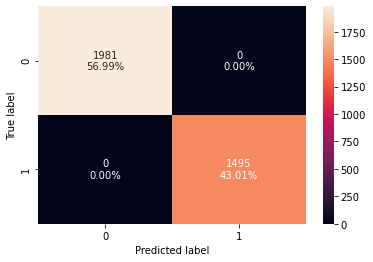

In [86]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(lg, X_train, y_train)

In [88]:
log_reg_model_train_perf = model_performance_classification_sklearn_with_threshold(
    lg, X_train, y_train
)

print("Training performance:")
log_reg_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


#### Checking performance on test set

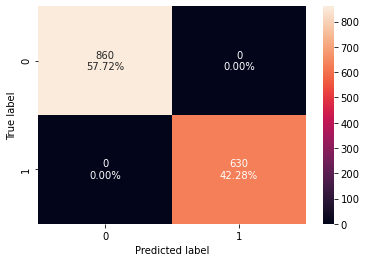

In [89]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(lg, X_test, y_test)

In [90]:
log_reg_model_test_perf = model_performance_classification_sklearn_with_threshold(
    lg, X_test, y_test
)

print("Test set performance:")
log_reg_model_test_perf

Test set performance:


,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


- Both the Performance of the Train & Test model is too good to be true .Accuracy is not always a good measure.
- We will check the threshold for optimal AUC 

#### ROC-AUC on training set

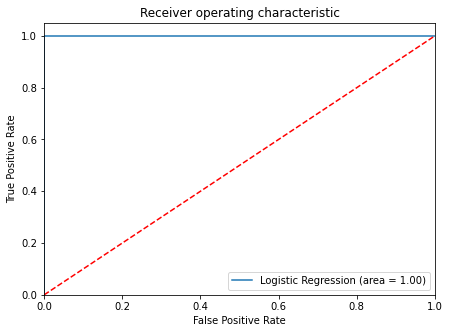

In [91]:
logit_roc_auc_train = roc_auc_score(y_train, lg.predict_proba(X_train)[:, 1])
fpr, tpr, thresholds = roc_curve(y_train, lg.predict_proba(X_train)[:, 1])
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

#### ROC-AUC on test set

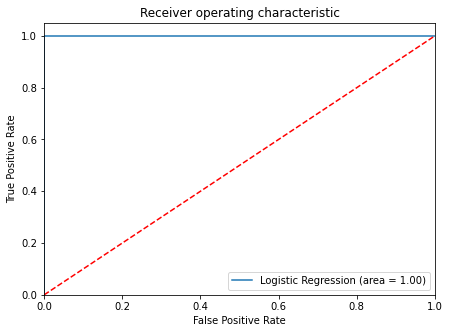

In [92]:
logit_roc_auc_test = roc_auc_score(y_test, lg.predict_proba(X_test)[:, 1])
fpr, tpr, thresholds = roc_curve(y_test, lg.predict_proba(X_test)[:, 1])
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_test)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

In [93]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, lg.predict_proba(X_train)[:, 1])

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.9101029805309264


### Checking model performance on training set

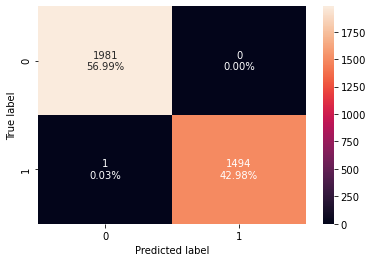

In [94]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    lg, X_train, y_train, threshold=optimal_threshold_auc_roc
)

In [95]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_sklearn_with_threshold(
    lg, X_train, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


,Accuracy,Recall,Precision,F1
0,0.999712,0.999331,1.0,0.999665


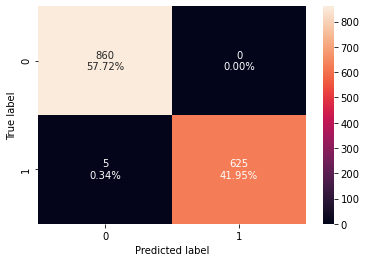

In [96]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    lg, X_test, y_test, threshold=optimal_threshold_auc_roc
)

In [98]:
# checking model performance for this model
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_sklearn_with_threshold(
    lg, X_test, y_test, threshold=optimal_threshold_auc_roc
)
print("Test set performance:")
log_reg_model_test_perf_threshold_auc_roc

Test set performance:


,Accuracy,Recall,Precision,F1
0,0.996644,0.992063,1.0,0.996016


- The precision of the model for both training and test set remains the same from default 
   threshold=0.9101029805309264  but the F1 score has reduced.

#### Precision-Recall curve and see if we can find a better threshold

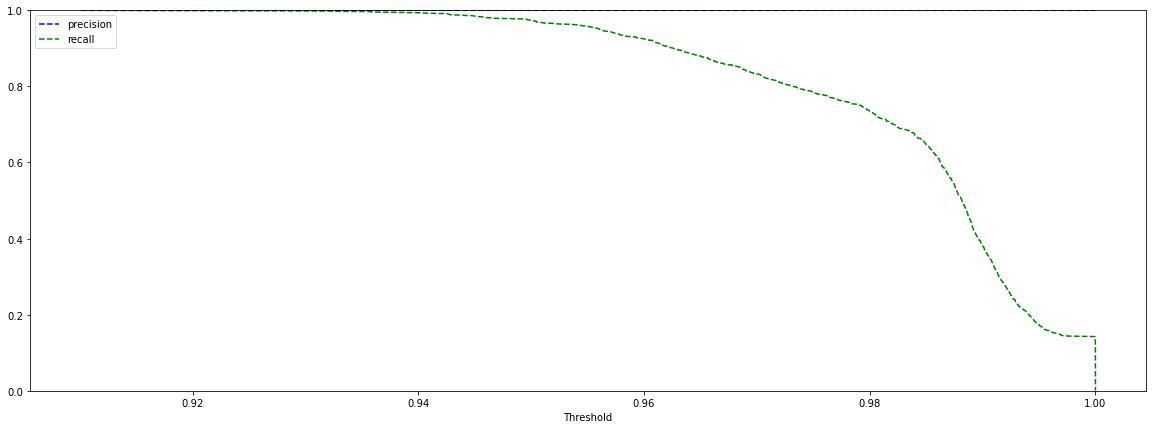

In [99]:
y_scores = lg.predict_proba(X_train)[:, 1]
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(20, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

In [100]:
# setting the threshold
optimal_threshold_curve = 0.94

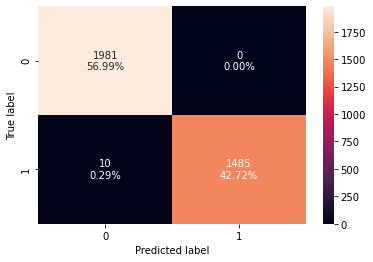

In [103]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    lg, X_train, y_train, threshold=optimal_threshold_curve
)

In [106]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_sklearn_with_threshold(
    lg, X_train, y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve 

Training performance:


,Accuracy,Recall,Precision,F1
0,0.997123,0.993311,1.0,0.996644


- With optimal_threshold_curve = 0.94 the the FN increases to 10 
- The TP increases to 1981 from 860 (threshold =.91).
- The TN increases from 625 to 1485.This decreses 

In [107]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression sklearn",
    "Logistic Regression-0.91 Threshold",
     "Logistic Regression-0.94 Threshold"
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression sklearn,Logistic Regression-0.91 Threshold,Logistic Regression-0.94 Threshold
Accuracy,1.0,0.999712,0.997123
Recall,1.0,0.999331,0.993311
Precision,1.0,1.000000,1.000000
F1,1.0,0.999665,0.996644


## Conclusion
- We have been able to build a logistic regression predictive model that that can predict the customers who can buy Personal Loans with the F1 score of 0.999665 based on the default threshold of 0.9101029805309264
- Age: Holding all other features constant a 1 unit change in Age will decrease the odds of a person buying of personal loan(True)  by 0.999233 times or a -0.076741% decrease in odds of buying of personal loan(True)

## Model Building - Decision Tree

####  Decision Tree Model performance evaluation and improvement
Try pruning technique(s) - Evaluate the model on appropriate metric - Comment on model performance

### Model can make wrong predictions as:

1. Predicting a customer will contribute to purchase of Personal loan but in reality the customer may not buy personal loans. - Waste of campaign funds

2. Predicting a customer will NOT contribute to purchase of Personal loan but in reality the customer may  buy personal loans. - Loss of opportunity for campaigns


### How to reduce this loss i.e need to reduce False Negatives?
-   Recall should be maximized, the greater the recall higher the chances of minimizing the false negatives.

#### Some Functions need for recall score and Confusion Matrix

In [108]:
##  Function to calculate recall score
def get_recall_score(model, predictors, target):
    """
    model: classifier
    predictors: independent variables
    target: dependent variable

    """
    prediction = model.predict(predictors)
    return recall_score(target, prediction)

In [109]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [110]:
model = DecisionTreeClassifier(
    criterion="gini", class_weight={0: 0.15, 1: 0.85}, random_state=1
)

In [111]:
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, random_state=1)

#### Checking model performance on training set

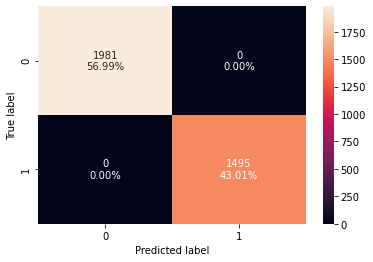

In [112]:
confusion_matrix_sklearn(model, X_train, y_train)

In [113]:
decision_tree_perf_train = get_recall_score(model, X_train, y_train)

print("Recall Score:", decision_tree_perf_train)

Recall Score: 1.0


- Model is able to perfectly classify all the data points on the training set.
- 0 errors on the training set, each sample has been classified correctly.
- As we know a decision tree will continue to grow and classify each data point correctly if no restrictions are applied as the trees will learn all the patterns in the training set.

#### Checking model performance on test set

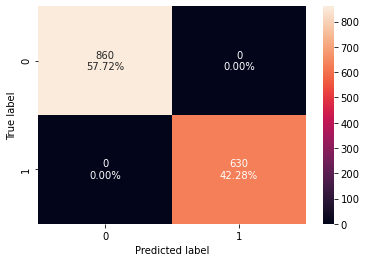

In [114]:
confusion_matrix_sklearn(model, X_test, y_test)

In [115]:
decision_tree_perf_test = get_recall_score(model, X_test, y_test)
print("Recall Score:", decision_tree_perf_test)

Recall Score: 1.0


- The training set and test set recall is same, which suggests that the model is NOT overfitting.

## Visualizing the Decision Tree

In [116]:
## creating a list of column names
feature_names = X_train.columns.to_list()

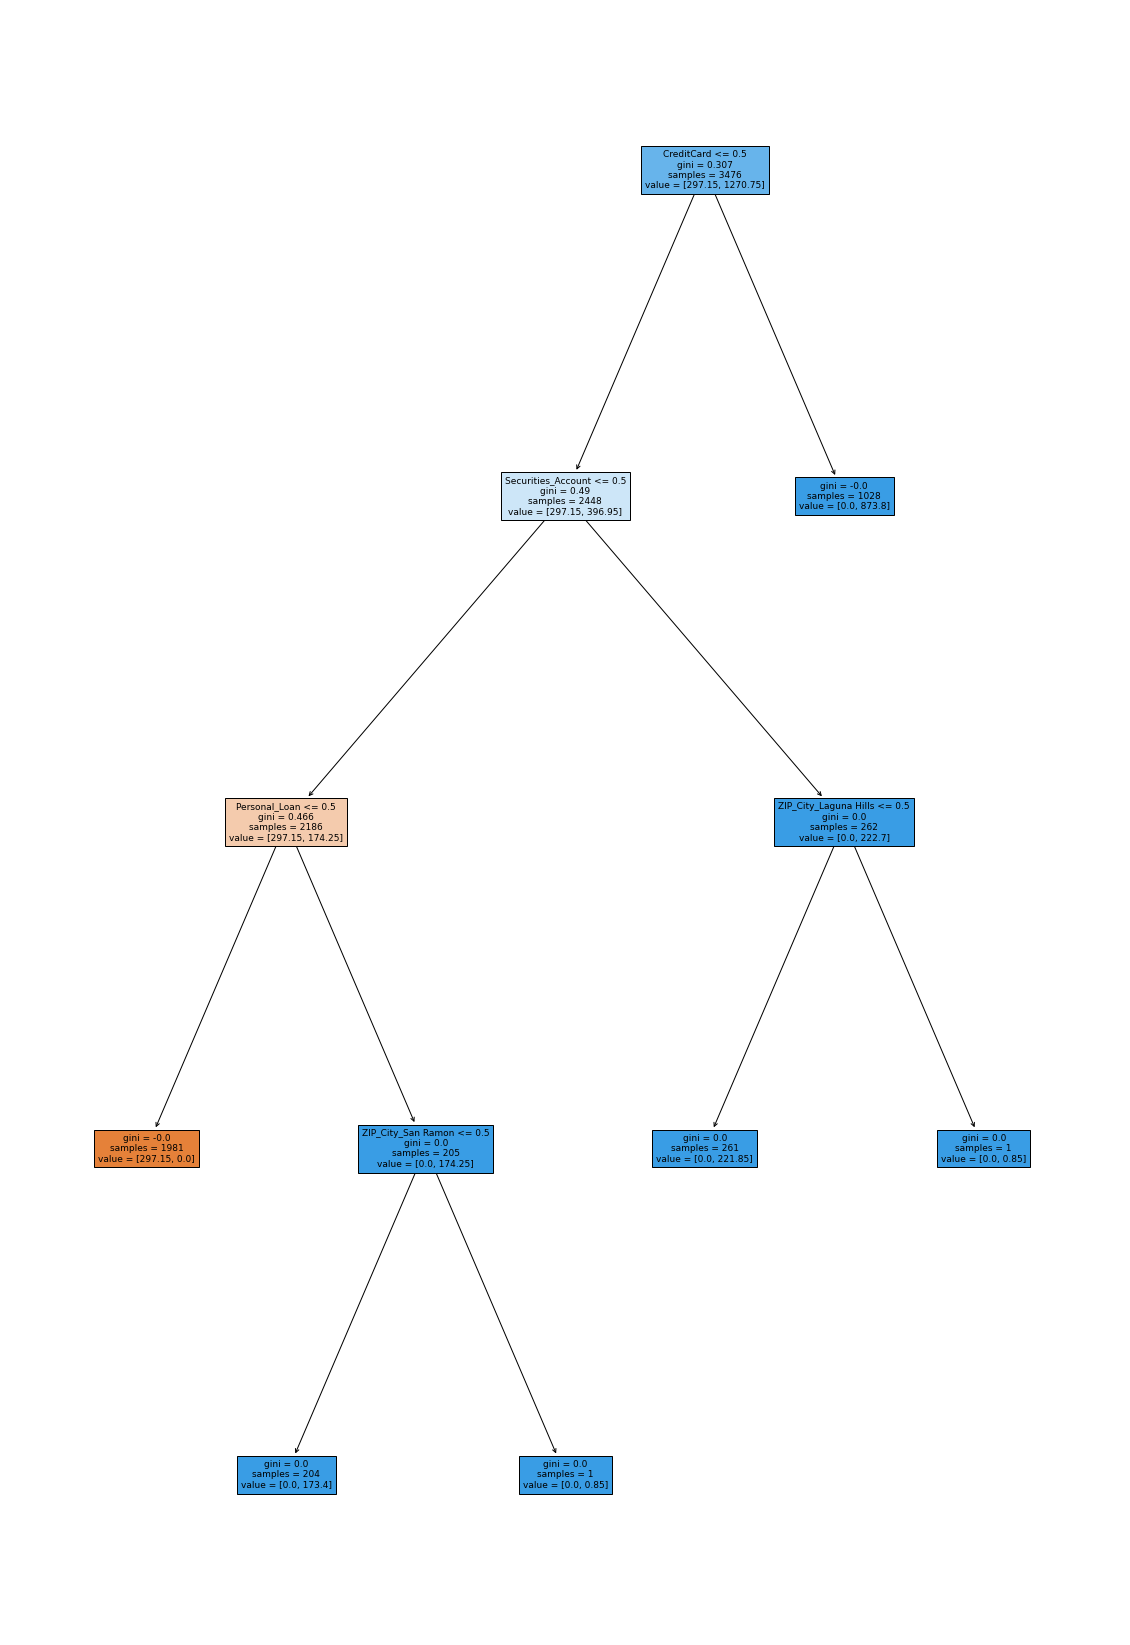

In [117]:
plt.figure(figsize=(20, 30))
out = tree.plot_tree(
    model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [118]:
print(tree.export_text(model, feature_names=feature_names, show_weights=True))

|--- CreditCard <= 0.50
|   |--- Securities_Account <= 0.50
|   |   |--- Personal_Loan <= 0.50
|   |   |   |--- weights: [297.15, 0.00] class: False
|   |   |--- Personal_Loan >  0.50
|   |   |   |--- ZIP_City_San Ramon <= 0.50
|   |   |   |   |--- weights: [0.00, 173.40] class: True
|   |   |   |--- ZIP_City_San Ramon >  0.50
|   |   |   |   |--- weights: [0.00, 0.85] class: True
|   |--- Securities_Account >  0.50
|   |   |--- ZIP_City_Laguna Hills <= 0.50
|   |   |   |--- weights: [0.00, 221.85] class: True
|   |   |--- ZIP_City_Laguna Hills >  0.50
|   |   |   |--- weights: [0.00, 0.85] class: True
|--- CreditCard >  0.50
|   |--- weights: [0.00, 873.80] class: True



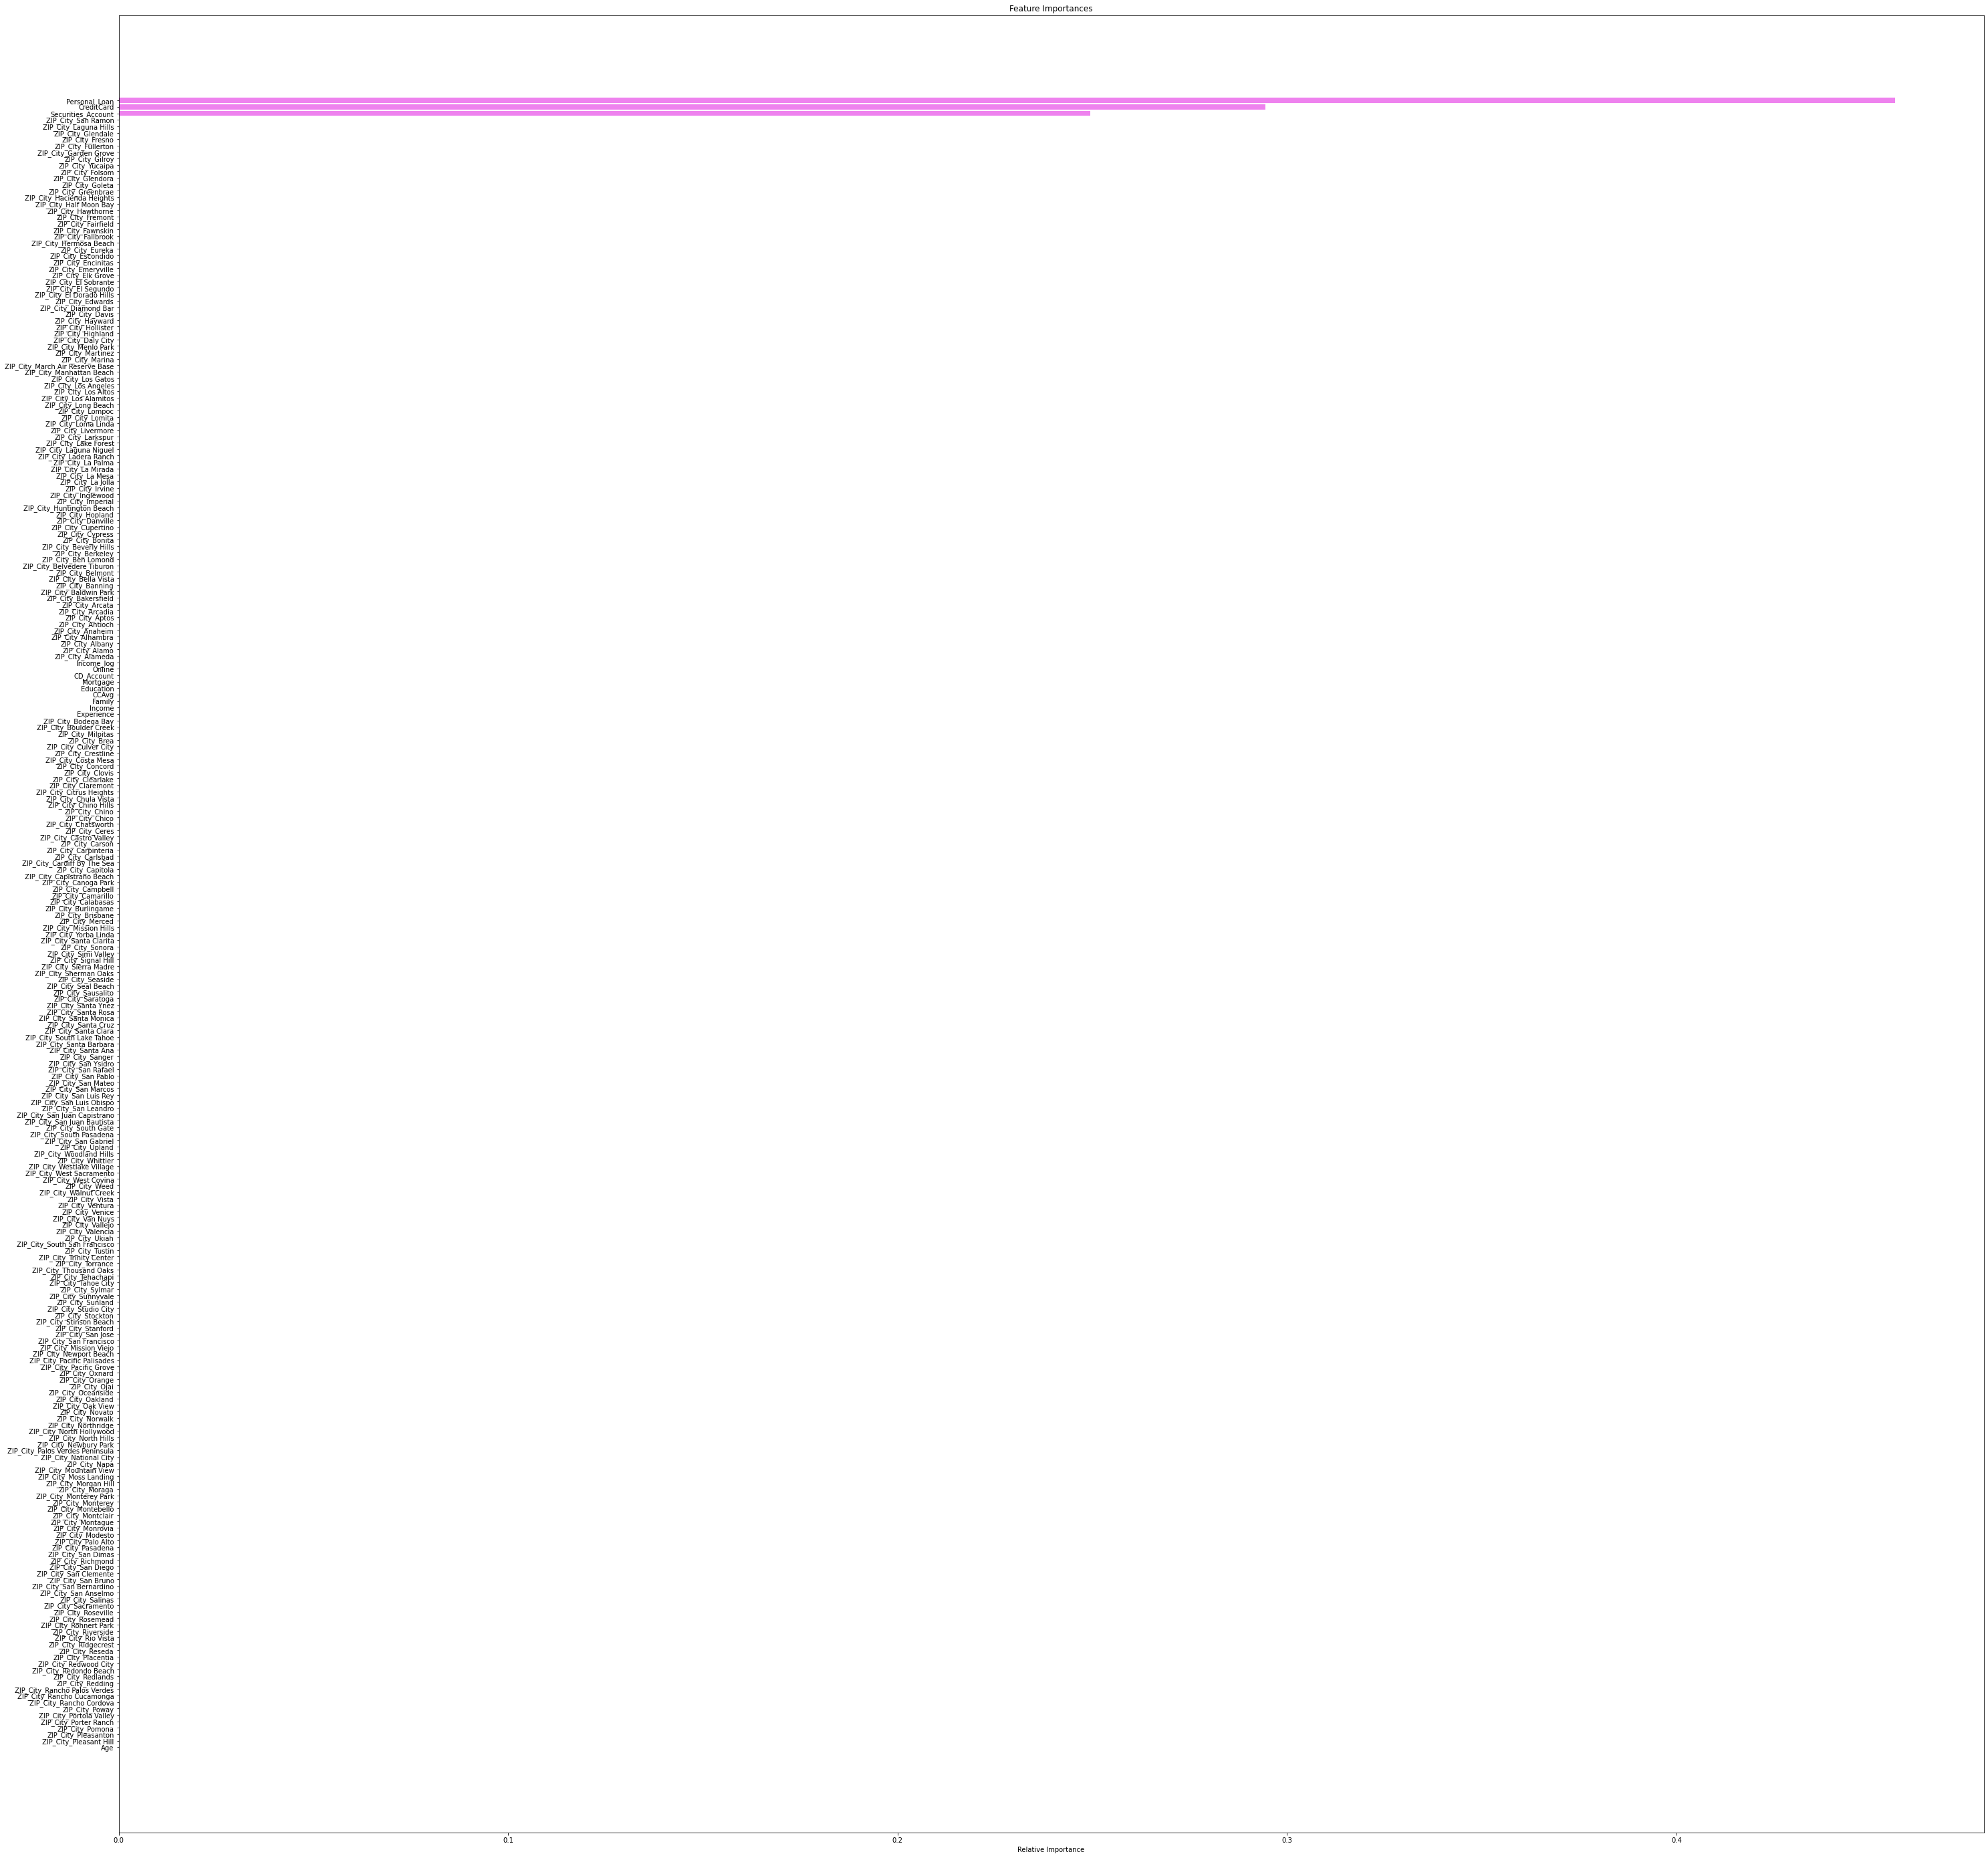

In [119]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(50,50))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- According to the decision tree model, Personal Loans ,Credit Card & Securities Account is the most important variable for predicting the dependent variable BuyPersonal_Loan.

## Cost Complexity Pruning

In [120]:
clf = DecisionTreeClassifier(random_state=1, class_weight={0: 0.15, 1: 0.85})
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [121]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000e+00,-7.379968e-14
1,3.516551e-15,-7.028313e-14
2,6.786211e-15,-6.349692e-14
3,1.024019e-01,3.072056e-01


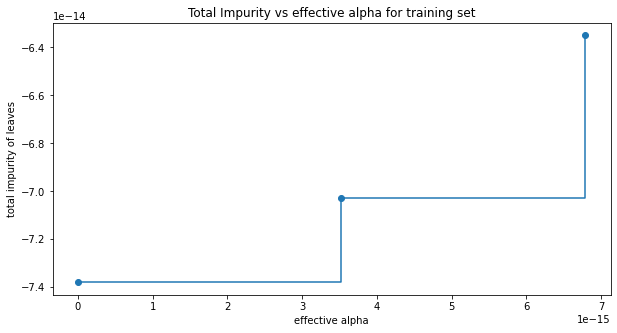

In [122]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Next, we train a decision tree using the effective alphas. The last value
in ``ccp_alphas`` is the alpha value that prunes the whole tree,
leaving the tree, ``clfs[-1]``, with one node.

In [124]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight={0: 0.15, 1: 0.85}
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.10240186673580605


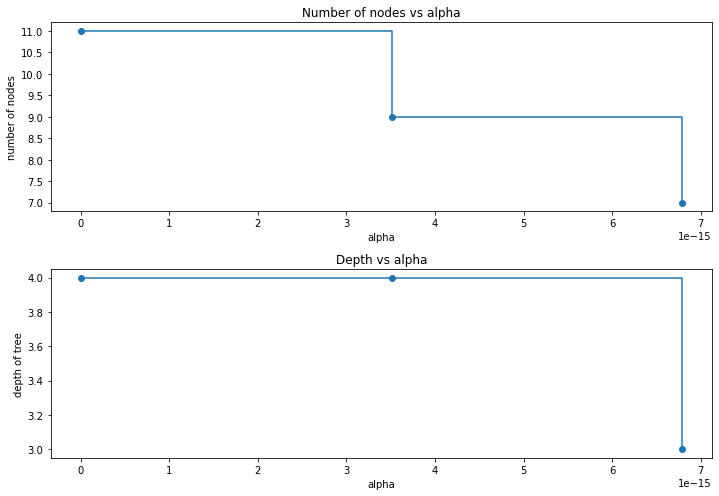

In [125]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [126]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

In [127]:
recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

In [128]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

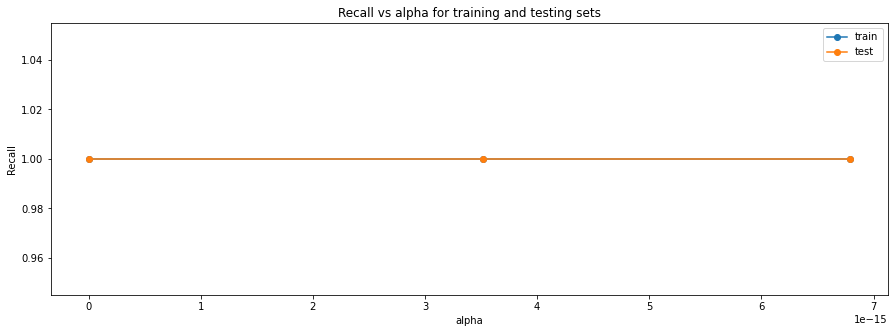

In [129]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(
    ccp_alphas,
    recall_train,
    marker="o",
    label="train",
    drawstyle="steps-post",
)
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [130]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, random_state=1)


In [131]:
best_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, random_state=1)

#### checking performance on training set

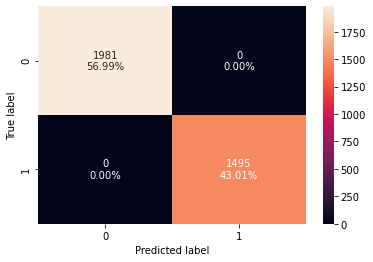

In [132]:
confusion_matrix_sklearn(best_model, X_train, y_train)

In [133]:
print("Recall Score:", get_recall_score(best_model, X_train, y_train))

Recall Score: 1.0


In [ ]:
#### checking performance on test set

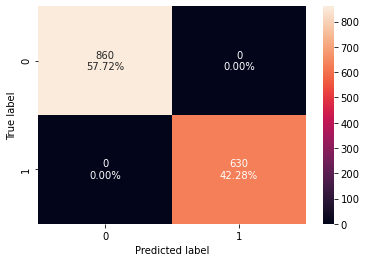

In [134]:
confusion_matrix_sklearn(best_model, X_test, y_test)

In [135]:
print("Recall Score:", get_recall_score(best_model, X_test, y_test))

Recall Score: 1.0


In [ ]:
### Visualizing the Decision Tree

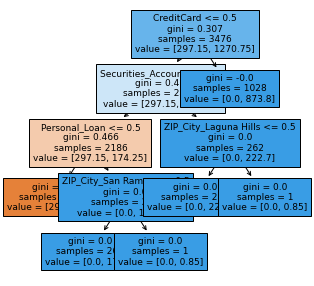

In [136]:
plt.figure(figsize=(5, 5))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [137]:
print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

|--- CreditCard <= 0.50
|   |--- Securities_Account <= 0.50
|   |   |--- Personal_Loan <= 0.50
|   |   |   |--- weights: [297.15, 0.00] class: False
|   |   |--- Personal_Loan >  0.50
|   |   |   |--- ZIP_City_San Ramon <= 0.50
|   |   |   |   |--- weights: [0.00, 173.40] class: True
|   |   |   |--- ZIP_City_San Ramon >  0.50
|   |   |   |   |--- weights: [0.00, 0.85] class: True
|   |--- Securities_Account >  0.50
|   |   |--- ZIP_City_Laguna Hills <= 0.50
|   |   |   |--- weights: [0.00, 221.85] class: True
|   |   |--- ZIP_City_Laguna Hills >  0.50
|   |   |   |--- weights: [0.00, 0.85] class: True
|--- CreditCard >  0.50
|   |--- weights: [0.00, 873.80] class: True



## Actionable Insights & Recommendations

- Age and Experience seems normally distributed.
- Income has a wider range and is skewed to the right.
- Mortgage data is skewed to the left.There are potential outliers.
- Using the log transformation for variable Income definitely helps in reducing the skew.
- 42% of the customers are under graduates,followed by 30% advanced Professionals.
- 90%+ most of the customers did not accept personal loans.
- 89%+ Most of the customers did not accept Securities_Account loans.
- 93 %+  of the customers did not accept Securities_Account loans.
- 59%+ users uses Internet banking facility.
- BuyPersonal_loan is having strong correlation with CreditCard.
- Income/Income_log and CCAVG are strongly correlated .
- Age and Experience are strongly correlated.Hence we can drop either one of the features.
- Family Size of 4 took the most number of Personal Loans offered.
- Most of the expected Personal Loan buyer custopmers are between 35 to 55 years old.
- Both the plots show customers with higher Mortgage has more probability of buying Personal loans.
Logistic regression :
- We have been able to build a logistic regression predictive model that that can predict the customers who can buy Personal Loans with the F1 score of 0.999665 based on the default threshold of 0.9101029805309264
- Age: Holding all other features constant a 1 unit change in Age will decrease the odds of a person buying of personal loan(True)  by 0.999233 times or a -0.076741% decrease in odds of buying of personal loan(True).
Decision Tree :
- Model is able to perfectly classify all the data points on the training set.
- 0 errors on the training set, each sample has been classified correctly.
- The training set and test set recall is the same, which suggests that the model is NOT overfitting.
- According to the decision tree model, Personal Loans ,Credit Card & Securities Account is the most important variable for predicting the dependent variable BuyPersonal_Loan.
